In [ ]:
import os
# Check if you're on Google drive or on your own machine.
# Get path to your data.
if ('google' in str(get_ipython())):
    from google.colab import drive
    drive.mount('ME', force_remount=True)
    predir='ME/MyDrive/Colab_Notebooks/thesis'

Mounted at ME


In [ ]:
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import pandas as pd
import numpy as np
import warnings
from tqdm import tqdm
import pickle

from sklearn.preprocessing import StandardScaler
import torch
import torch.nn as nn

import os
os.environ['CUDA_LAUNCH_BLOCKING'] = "1"

In [ ]:
groups = {
    'cat': ['nala_cat','realgrumpycat','smoothiethecat','catconworldwide','maple.cat','catinberlin','catladybox','triumphant_teagan','aliencatmatilda','mollymollzthetabby','my_lulu_cat_','my_furry_babies','monicasisson','allcreaturestv','moana.and.snapple','thatcatconrad','catsvscancer','baili_the_cat','panther.cat','rajathebengal','butter_the_siberian','trippy.tails','bearbear.cat','mochicat168','bellina_kitty_cat','rainerogers','ambrosepets','realbadgalrhirhi','pawaiihub','denbo_nish','siberian.milo'],
    'cook': ['halfbakedharvest','ketosnackz','nourishing','smittenkitchen','olivia.adriance','chloecleroux','geoffreyzakarian','177milkstreet','winnyhayes','alyssacoadynutrition','liveeatlearn','thefoodnanny','femalefoodie','sherryhour','allinspiredwellness','mytoddlerskitchen','simplicityandastarter','reciperunner','jamleenbears','lydialove98','mleroehler','anniesfinds_','carnivore_connoisseur_','littlespoonfarmblog','perfectsupplements','feelgoodwithfi','yourstrulyani','thismomentinthyme','leahmariestack','through.manals.lens','recipesfrommichelle','mccauley_tawpash','mintandclove','ashleighbovard','neeleman_food_'],
    # using lda
    'brands' : ['nike', 'adidas', 'starbucks', 'apple', 'samsung', 'netflix', 'amazon', 'google', 'microsoft', 'tesla', 'cocacola', 'pepsi', 'redbull', 'louisvuitton', 'gucci', 'chanel', 'prada', 'zara', 'hugo', 'hm', 'ikea', 'lego', 'target', 'walmart', 'mcdonalds', 'burgerking', 'kfc', 'dominos', 'airbnb', 'uber', 'spotify', 'youtube', 'facebook', 'instagram', 'twitter', 'pinterest', 'tiktok', 'snapchat', 'linkedin', 'sony', 'playstation', 'xbox', 'nintendo', 'disney', 'marvel', 'pixar', 'warnerbros', 'hbo', 'hulu', 'espn', 'nba', 'nfl', 'fifa', 'nikefootball', 'adidasfootball', 'puma', 'underarmour', 'reebok', 'converse', 'vans', 'forever21', 'victoriassecret', 'calvinklein', 'tommyhilfiger', 'ralphlauren', 'burberry', 'dior', 'versace', 'balenciaga', 'givenchy', 'fendi', 'hermes', 'cartier', 'tiffanyandco', 'rayban', 'oakley', 'gopro', 'canon', 'nikon', 'sonymusic', 'universalmusic', 'warnerrecords', 'atlanticrecords', 'rollingstone', 'vogue', 'elle', 'harpersbazaar', 'cosmopolitan'],
    # using deepseek
    'celebrities' : ['cristiano', 'leomessi', 'selenagomez', 'therock', 'kyliejenner', 'arianagrande', 'kimkardashian', 'beyonce', 'khloekardashian', 'justinbieber', 'kendalljenner', 'taylorswift', 'jlo', 'nickiminaj', 'kourtneykardash', 'mileycyrus', 'katyperry', 'zendaya', 'kevinhart4real', 'kingjames', 'ddlovato', 'badgalriri', 'champagnepapi', 'ellendegeneres', 'k.mbappe', 'billieeilish', 'lalalalisa_m', 'vindiesel', 'shraddhakapoor', 'priyankachopra', 'narendramodi', 'shakira', 'snoopdogg', 'davidbeckham', 'dualipa', 'jennierubyjane', 'aliaabhatt'],
    # using chatgpt
    'democrats' : ['joebiden', 'kamalaharris', 'barackobama', 'michelleobama', 'berniesanders', 'aoc', 'chuckSchumer', 'elizabethwarren', 'amyklobuchar', 'corybooker', 'chrismurphyct', 'repjerrynadler', 'repkatieporter', 'repvaldemings', 'repdebhaaland', 'repmarkpocan', 'repjimmygomez', 'repdavidcicilline', 'repdonbeyer', 'repderekkilmer', 'repsusielee', 'repkathleenrice', 'repjimhimes', 'repgregstanton', 'repjuanvargas', 'repmikethompson', 'repjimlangevin', 'repjimcosta', 'repjimmygomez', 'repjoshharder', 'repkatiehill'],
    'republicans' : ['mikepence', 'realdonaldtrump', 'potus', 'lindseygrahamsc', 'tedcruz', 'mittromney', 'pauldavisryan', 'ronjohnsonwi', 'marcorubio', 'newtgingrich', 'speakermccarthy', 'johncornyn', 'rondesantis', 'kristinoem', 'stevescalise', 'markmeadows', 'tx', 'elisestefanik', 'leezeldin', 'cathymcmorris', 'replizcheney', 'repmattgaetz', 'repbrianmast', 'repgregpence', 'repmarkgreen', 'repbuddycarter', 'repjeffduncan', 'repdavidkustoff', 'reppatfallon', 'repchrisstewart', 'repkenbuck'],
    # using deepseek

    'news': ['wsj', 'financialtimes', 'msnbc', 'cspan', 'theintercept', 'aljazeera', 'foxnews', 'guardian', 'time', 'nytimes', 'newsweek', 'bbcnews', 'bloomberg', 'nypost', 'businessinsider', 'cnn', 'forbes,politico', 'huffpost', 'abcnews', 'nbcnews', 'axios', 'thehill', 'cbsnews', 'usatoday', 'washingtonpost', 'vice', 'latimes', 'reuters', 'thedailybeast', 'npr', 'apnews'],

    'gun' : ['garand_thumb','gunpolicy','gunownersofamerica','sb.tactical','lawtactical','midwestindustries','centuryarms','gundrummer','griffin_armament','down_range_photography','maximdefense','zaffiri.precision','pewpewtactical','killerinnovations','rarebreedfirearms','battleborn','xtechtactical','gregskazphotography','kci_usa','firearmchronicles','patriot_defense_gear','704_tactical','armedscholaryt','shootersgrill','elevatedsilence','sdgunowners','womenforgunrights','gunownersca','2arally','rmgo_official'],
    # using lda

    'healthright' : ['thetruthaboutcancerttac','elaineshtein','drmercola','joshsfarmersmarket','dr.goodyear','crunchykass','raw_farm_usa','farmmatch','theregenaissance','momsacrossamerica','freedom.hill.farm','ilanamuhlsteinrd','jessalyn.randle','bobolinkdairyandbakehouse'],
    # using sbert

    'healthleft' : ['peoplescdc','clean.air.club','youlookokaytome','topheravila','thesicktimes','longcovidjustice','thaibrows','berlin_buyers_club','la.spoonie.collective','thecovidcollection','long_hauler_haven','maskednh','jaydocovid','maskblocseattle','cleartheair.atx','transgressivemedicine','itsjiyounkim'],

    # using sbert
    'queer' : ['them','themilesmckenna','queer_lective','dylanmulvaney','themme_fatale','chellaman','tanyacompas','mattxiv','sadegiliberti','jessicaoutofthecloset','genderlib','jake_graf5','raindovemodel','plussizetransguy','trans.ginger','trevorproject','chandlernwilson','blacktranstravelfund','mpjinstitute','gabesdunn'],

    'palestine' : ['jd.moha','mikopeled','wizard_bisan1','jewishvoiceforpeace','plestia.alaqad','belalkh','zein_rahma','eid_yara','lama_jamous9','jenanmatari','dr.ghassan.as','nooh.xp','savesilwan','amirgharabawi','saher_alghorra','haneen.maher.salem','palmuseum','yplusmedia','palestinianyouthmovement','right2edu','sjp.uo','uospalsoc','bigbigbigthings','jaxpsn','alaa_fayez.12','wizard_bisan2','bayanpalestine','mohammadhureini','hind.touissate','palestinehouseoffreedom','taniasafi','nadiforpalestine','queersinpalestine','apc_uk_london','shirien.creates','operationolivebranch'],
    'zionist' : ['betarworldwide','israelcc','standwithus','jewishwomen4allwomen','adielofisrael','ajc.global', 'strength4israel','_danielbraun','montanatucker','proudzionista','antisemitism','j.majburd','israel365action','bringhomenow','bring.amiram.home.now','aipac','kidnappedfromisrael','dahliakurtz','cameraoncampus','mactaskforce','elizabethyounger','lanianpo','henmazzig','freejamshidsharmahd','natashahausdorff','worldjewishcongress','allhostages','bringbackourhearts','thepersianjewess','michahdoot','leetrink','themodernmaccabee','ajewishresistance','zicksworld','abbasez'], # 'susancollinsla' not just israel

    'tradwife' : ['ourquaintandcozy','call_mejewels','hannahlee.yoder','simplyalliehomestead','ballerinafarm','esteecwilliams','zimcolorado','classicallyabby','naraaziza','lifewithmrsp', '_cynthialoewenseguin']
    # using sbert
}
groupmap = {v: k for k, vs in groups.items() for v in vs}
group_titles = {
    'cat': 'Cat',
    'cook': 'Cooking',
    'brands': 'Brands',
    'celebrities': 'Celebrities',
    'democrats': 'Democrats',
    'republicans': 'Republicans',
    'news': 'News',
    'gun': 'Gun',
    'healthright': 'Health Right',
    'healthleft': 'Health Left',
    'queer': 'LGBTQ',
    'palestine':'Pro-Palestine',
    'zionist': 'Zionist',
    'tradwife': 'Tradwives'
}
group_order = ['cat', 'cook', 'brands', 'celebrities', 'news','democrats', 'republicans', 'healthright', 'healthleft','gun', 'queer', 'tradwife','palestine', 'zionist']

finished_usernames = "thismomentinthyme,shraddhakapoor,trans.ginger,recipesfrommichelle,zaffiri.precision,reppatfallon,repdonbeyer,baili_the_cat,businessinsider,shootersgrill,trippy.tails,ambrosepets,classicallyabby,chellaman,ballerinafarm,patriot_defense_gear,mattxiv,bobolinkdairyandbakehouse,lindseygrahamsc,moana.and.snapple,instagram,mittromney,yplusmedia,arianagrande,_danielbraun,hind.touissate,plussizetransguy,selenagomez,through.manals.lens,repkenbuck,allinspiredwellness,jewishvoiceforpeace,taylorswift,pawaiihub,cspan,jaxpsn,repjerrynadler,mytoddlerskitchen,rarebreedfirearms,berniesanders,nooh.xp,xtechtactical,kevinhart4real,kamalaharris,repjuanvargas,catsvscancer,shakira,disney,themilesmckenna,taniasafi,repmarkpocan,itsjiyounkim,apc_uk_london,bigbigbigthings,rondesantis,target,reciperunner,chandlernwilson,palmuseum,repjimcosta,bayanpalestine,underarmour,nala_cat,bearbear.cat,repkathleenrice,liveeatlearn,barackobama,repjimhimes,aoc,repdebhaaland,cristiano,mcdonalds,lalalalisa_m,rmgo_official,smoothiethecat,tanyacompas,zendaya,louisvuitton,kimkardashian,calvinklein,victoriassecret,speakermccarthy,gabesdunn,queer_lective,montanatucker,down_range_photography,davidbeckham,belalkh,sdgunowners,repdavidkustoff,chrismurphyct,adidasfootball,winnyhayes,johncornyn,panther.cat,longcovidjustice,geoffreyzakarian,triumphant_teagan,blacktranstravelfund,ajewishresistance,nourishing,feelgoodwithfi,thetruthaboutcancerttac,israelcc,cartier,haneen.maher.salem,kourtneykardash,trevorproject,repbuddycarter,aliaabhatt,alaa_fayez.12,proudzionista,repjimlangevin,tedcruz,khloekardashian,transgressivemedicine,drmercola,pauldavisryan,michahdoot,repdavidcicilline,adielofisrael,freejamshidsharmahd,repkatieporter,sonymusic,repsusielee,leahmariestack,jake_graf5,microsoft,amirgharabawi,halfbakedharvest,billieeilish,femalefoodie,jlo,la.spoonie.collective,shirien.creates,mikepence,leezeldin,freedom.hill.farm,mpjinstitute,reuters,justinbieber,repbrianmast,lawtactical,704_tactical,ketosnackz,jessicaoutofthecloset,marcorubio,mccauley_tawpash,jennierubyjane,youlookokaytome,beyonce,gunownersofamerica,killerinnovations,elizabethyounger,right2edu,sadegiliberti,mleroehler,mintandclove,jd.moha,thaibrows,kyliejenner,them,esteecwilliams,starbucks,bloomberg,butter_the_siberian,my_furry_babies,pewpewtactical,farmmatch,alyssacoadynutrition,joebiden,repmarkgreen,priyankachopra,elevatedsilence,lydialove98,chloecleroux,amazon,thatcatconrad,narendramodi,hulu,aipac,kendalljenner,repgregpence,catconworldwide,badgalriri,uospalsoc,mikopeled,kristinoem,dylanmulvaney,dahliakurtz,champagnepapi,warnerrecords,repvaldemings,naraaziza,replizcheney,bellina_kitty_cat,repjoshharder,repchrisstewart,tommyhilfiger,neeleman_food_,aliencatmatilda,joshsfarmersmarket,raw_farm_usa,mohammadhureini,corybooker,plestia.alaqad,denbo_nish,wizard_bisan1,gundrummer,nickiminaj,kingjames,savesilwan,sb.tactical,ellendegeneres,antisemitism,gunownersca,topheravila,peoplescdc,rainerogers,repjimmygomez,abbasez,firearmchronicles,repkatiehill,mollymollzthetabby,anniesfinds_,lanianpo,zein_rahma,jessalyn.randle,call_mejewels,allcreaturestv,monicasisson,google,themme_fatale,maple.cat,perfectsupplements,kci_usa,nikefootball,mactaskforce,mochicat168,armedscholaryt,elaineshtein,kfc,chuckSchumer,leetrink,canon,catinberlin,battleborn,thefoodnanny,ourquaintandcozy,michelleobama,womenforgunrights,littlespoonfarmblog,zicksworld,olivia.adriance,leomessi,sherryhour,newtgingrich,elisestefanik,my_lulu_cat_,realgrumpycat,henmazzig,griffin_armament,_cynthialoewenseguin,repderekkilmer,centuryarms,lifewithmrsp,2arally,dr.goodyear,prada,eid_yara,ilanamuhlsteinrd,dominos,repjeffduncan,maximdefense,stevescalise,ashleighbovard,garand_thumb,k.mbappe,siberian.milo,nikon,cameraoncampus,realbadgalrhirhi,markmeadows,ronjohnsonwi,vice,raindovemodel,momsacrossamerica,repmattgaetz,repgregstanton,xbox,vindiesel,repmikethompson,katyperry,cathymcmorris,apple,therock,cosmopolitan,themodernmaccabee,pixar,ddlovato,worldjewishcongress,elizabethwarren,gopro,saher_alghorra,gunpolicy,catladybox,gregskazphotography,mileycyrus,midwestindustries,spotify,realdonaldtrump,yourstrulyani,amyklobuchar".split(",")

In [ ]:
with open(predir+'/data/df_bypost_all.pkl', 'rb') as f:
    df_bypost = pickle.load(f)

df_bypost = df_bypost.dropna(subset=['post_times']).query('likes > 0')[df_bypost['username'].isin(finished_usernames)]

# Extract cyclical time features
def fourier_encode(df):
    df['hour'] = df['post_times'].dt.hour
    df['day_of_week'] = df['post_times'].dt.dayofweek  # 0=Monday
    df['month'] = df['post_times'].dt.month
    df['hour_sin'] = np.sin(2 * np.pi * df['hour'] / 24)
    df['hour_cos'] = np.cos(2 * np.pi * df['hour'] / 24)
    df['day_sin'] = np.sin(2 * np.pi * df['day_of_week'] / 7)
    df['day_cos'] = np.cos(2 * np.pi * df['day_of_week'] / 7)
    df['month_sin'] = np.sin(2 * np.pi * df['month'] / 12)
    df['month_cos'] = np.cos(2 * np.pi * df['month'] / 12)
    return df

data = fourier_encode(df_bypost)


# Time since last post (in hours)
data['timedelta'] = data['timedelta'].fillna(-1)  # First post

data['log_likes'] = np.log(data['likes']+1)

# Rolling average of likes (past 10 posts)
data['rolling_likes'] = (
    data.groupby('username')['log_likes']
    .transform(lambda x: x.shift(1).rolling(14, min_periods=1).mean())
)

# get the rate of change using np.gradient
data['deriv1'] = np.gradient(data['rolling_likes'])
data['deriv2'] = np.gradient(data['deriv1'])

# make dummy variable for username
# dummies = pd.get_dummies(data['username'], columns=['username'], prefix = "username")
# data = pd.concat([data, dummies], axis=1)

# dummies = pd.get_dummies(data['group'], columns=['group'], prefix = 'group')
# data = pd.concat([data, dummies], axis=1)

<ipython-input-5-e3cc864b828c>:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_bypost = df_bypost.dropna(subset=['post_times']).query('likes > 0')[df_bypost['username'].isin(finished_usernames)]


In [ ]:
REACHBACK = 14
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

In [ ]:
split_before = pd.to_datetime('2023-10-01')
data_before = data[data['date'] < split_before]

split = pd.to_datetime('2024-02-01')
data_after = data[data['date'] >= split]

# for the data before, for group = [palestine,zionist], only include data after 10/07/2023
# remove = data_before.query('date >= "2023-10-07" and group.isin(["palestine","zionist"])')
# data_before = data_before[~data_before.index.isin(remove.index)]

# for the data after, only include [reachback:] for each account
data_after = data_after.groupby('username').apply(lambda x: x.iloc[REACHBACK:]).reset_index(drop=True)
# data_after = data_after[data_after['date'] < pd.to_datetime('2024-03-01')]

<ipython-input-6-4f91e94cbecc>:12: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  data_after = data_after.groupby('username').apply(lambda x: x.iloc[REACHBACK:]).reset_index(drop=True)


In [ ]:
split_before = pd.to_datetime('2024-07-01') # also try 6, 5, 4
data_before = data[data['date'] < split_before]
data_before = data[data['date'] > pd.to_datetime('2023-11-01')]

split = pd.to_datetime('2024-08-01')
data_after = data[data['date'] >= split]
data_after = data_after[data_after['date'] <= pd.to_datetime('2024-11-01')]

# for the data after, only include [reachback:] for each account
data_after = data_after.groupby('username').apply(lambda x: x.iloc[REACHBACK:]).reset_index(drop=True)

<ipython-input-6-522c90d801af>:10: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  data_after = data_after.groupby('username').apply(lambda x: x.iloc[REACHBACK:]).reset_index(drop=True)


# models


In [ ]:
def df_to_traintest(df, PrepData):
  dataprepper = PrepData(df, reachback_length = REACHBACK)
  dataset = [x for x in dataprepper.get_dataset()]

  X, y = torch.cat([x[0] for x in dataset], dim=0), torch.tensor([x[1] for x in dataset])
  X = X.reshape(len(dataset), dataprepper.reachback_length*X.shape[1])

  train, val = torch.utils.data.random_split(list(zip(X,y)), [int(0.8*len(dataset)), len(dataset) - int(0.8*len(dataset))])

  print(f"Train size: {len(train)}")
  print(f"Val size: {len(val)}")

  trainx, trainy = np.vstack([x[0] for x in train]), np.array([x[1] for x in train])
  valx, valy = np.vstack([x[0] for x in val]), np.array([x[1] for x in val])
  # testx, testy = np.vstack([x[0] for x in test]), np.array([x[1] for x in test])

  # Convert numpy arrays to PyTorch datasets
  train_dataset = torch.utils.data.TensorDataset(torch.tensor(trainx, dtype=torch.float32),
                                                torch.tensor(trainy, dtype=torch.float32))
  val_dataset = torch.utils.data.TensorDataset(torch.tensor(valx, dtype=torch.float32),
                                              torch.tensor(valy, dtype=torch.float32))

  # Create data loaders
  batch_size = 64
  train_loader = torch.utils.data.DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
  val_loader = torch.utils.data.DataLoader(val_dataset, batch_size=batch_size)

  return train_loader, val_loader

def data_loader(df,PrepData, reachback_length=REACHBACK):
    dataprepper = PrepData(df, single_user=True, reachback_length=reachback_length)
    dataset = [x for x in dataprepper.get_dataset()]
    x, y = np.vstack([x[0] for x in dataset]), np.array([x[1] for x in dataset])
    x = x.reshape(len(dataset), dataprepper.reachback_length*x.shape[1])

    dataset = torch.utils.data.TensorDataset(torch.tensor(x, dtype=torch.float32),
                                             torch.tensor(y, dtype=torch.float32))
    batch_size = 64
    loader = torch.utils.data.DataLoader(dataset, batch_size=batch_size)
    return loader

In [ ]:
class OneBranchPrepData():
    def __init__(self, df, reachback_length=REACHBACK,single_user=False):
        self.df = df
        self.reachback_length = reachback_length
        self.users = df['username'].unique()
        self.single_user = single_user

        # Precompute reachback
        self.reachback = []
        if self.single_user:
          for i in range(len(self.df) - (self.reachback_length)):
              seq = self.df.iloc[i:i+self.reachback_length]
              target = self.df.iloc[i+self.reachback_length]['likes']
              target = np.log(target+1)
              self.reachback.append((seq, target))
        else:
          for user in self.users:
              user_df = self.df[self.df['username'] == user]
              for i in range(len(user_df) - (self.reachback_length)):
                  seq = user_df.iloc[i:i+self.reachback_length]
                  target = user_df.iloc[i+self.reachback_length]['likes']
                  target = np.log(target+1)
                  self.reachback.append((seq, target))

    def __getitem__(self, idx):
        reachback, target = self.reachback[idx]

        # Text embeddings (reachback_length x 384)
        text_features = torch.tensor(
            np.stack(reachback['caption_embedding'].values),
            dtype=torch.float32
        )

        # # Time features (reachback_length x 6)
        # time_features = torch.tensor(
        #     reachback[['hour_sin', 'hour_cos', 'day_sin', 'day_cos', 'month_sin', 'month_cos']].values,
        #     dtype=torch.float32
        # )

        # Historical features (reachback_length x 2)
        # historical_features = torch.tensor(
        #     reachback[['rolling_likes','timedelta']].values,
        #     dtype=torch.float32
        # )

        X = torch.cat([text_features], dim=1)
        return X, target

    def get_dataset(self):
      if self.single_user:
          for i in range(len(self.reachback)):
              value = self.__getitem__(i)
              # check if there is any nan
              if value[0].isnan().any():
                  continue
              else:
                yield value
      else:
          for user in self.users:
              user_df = self.df[self.df['username'] == user]
              for i in range(len(user_df) - self.reachback_length):
                  value = self.__getitem__(i)
                  # check if there is any nan
                  if value[0].isnan().any():
                      continue
                  else:
                    yield value

class OneBranchLikesPredictor(nn.Module):
    def __init__(self, sbert_dim=384, time_dim=6, historical_dim=0,
                 hidden_dim=64, reachback_length=REACHBACK,
                 verobose=False):
        super().__init__()
        self.reachback_length = reachback_length
        self.sbert_dim = sbert_dim
        self.time_dim = time_dim
        self.historical_dim = historical_dim

        self.verbose = verobose

        # Text processing
        self.text_fc = nn.Linear(sbert_dim, 128) # play with output dimension

        # LSTM for temporal/historical patterns
        self.lstm = nn.LSTM(
            input_size= 128 + historical_dim,
            hidden_size=hidden_dim,
            batch_first=True
        )

        # Final prediction
        self.fc = nn.Sequential(
            nn.Linear(64, 32),
            nn.ReLU(),
            nn.Linear(32, 1)
        )

    def forward(self, x):
        # Reshape input: (batch_size, reachback_length * total_features) ->
        # (batch_size, reachback_length, total_features)
        x = x.view(-1, self.reachback_length, self.sbert_dim + self.historical_dim)

        # Split features
        text_features = x[:, :, :self.sbert_dim]
        # historical_features = x[:, :, self.sbert_dim:self.sbert_dim + self.historical_dim]
        # historical_features = x[:, :, self.sbert_dim+self.time_dim:self.sbert_dim + self.historical_dim]

        if self.verbose:
            print(f"Text features shape: {text_features.shape}")
            # print(f"Historical features shape: {historical_features.shape}")

        # Process text (batch_size, reachback_length, 128)
        text_emb = self.text_fc(text_features)

        if self.verbose:
            print(f"text fc: {text_emb.shape}")

        # Process temporal features (batch_size, reachback_length, 6)
        temporal_input = torch.cat([text_emb], dim=2)
        lstm_out, _ = self.lstm(temporal_input)
        lstm_last = lstm_out[:, -1, :]  # Last timestep

        return self.fc(lstm_last)

In [ ]:
class TwoBranchPrepData():
    def __init__(self, df, reachback_length=REACHBACK,single_user=False):
        self.df = df
        self.reachback_length = reachback_length
        self.users = df['username'].unique()
        self.single_user = single_user

        # Precompute reachback
        self.reachback = []
        if self.single_user:
          for i in range(len(self.df) - (self.reachback_length)):
              seq = self.df.iloc[i:i+self.reachback_length]
              target = self.df.iloc[i+self.reachback_length]['likes']
              target = np.log(target+1)
              self.reachback.append((seq, target))
        else:
          for user in self.users:
              user_df = self.df[self.df['username'] == user]
              for i in range(len(user_df) - (self.reachback_length)):
                  seq = user_df.iloc[i:i+self.reachback_length]
                  target = user_df.iloc[i+self.reachback_length]['likes']
                  target = np.log(target+1)
                  self.reachback.append((seq, target))

    def __getitem__(self, idx):
        reachback, target = self.reachback[idx]

        # Text embeddings (reachback_length x 384)
        text_features = torch.tensor(
            np.stack(reachback['caption_embedding'].values),
            dtype=torch.float32
        )

        # Time features (reachback_length x 6)
        time_features = torch.tensor(
            reachback[['hour_sin', 'hour_cos', 'day_sin', 'day_cos', 'month_sin', 'month_cos']].values,
            dtype=torch.float32
        )

        # Historical features (reachback_length x 4)
        historical_features = torch.tensor(
            reachback[['rolling_likes', 'timedelta','deriv1','deriv2']].values,
            dtype=torch.float32
        )

        X = torch.cat([text_features, time_features, historical_features], dim=1)
        return X, target

    def get_dataset(self):
      if self.single_user:
          for i in range(len(self.reachback)):
              value = self.__getitem__(i)
              # check if there is any nan
              if value[0].isnan().any():
                  continue
              else:
                yield value
      else:
          for user in self.users:
              user_df = self.df[self.df['username'] == user]
              for i in range(len(user_df) - self.reachback_length):
                  value = self.__getitem__(i)
                  # check if there is any nan
                  if value[0].isnan().any():
                      continue
                  else:
                    yield value

class TwoBranchLikesPredictor(nn.Module):
    def __init__(self, sbert_dim=384, time_dim=6, historical_dim=4,
                 hidden_dim=64, reachback_length=REACHBACK,
                 verobose=False):
        super().__init__()
        self.reachback_length = reachback_length
        self.sbert_dim = sbert_dim
        self.time_dim = time_dim
        self.historical_dim = historical_dim

        self.verbose = verobose

        # Text processing
        self.text_fc = nn.Linear(sbert_dim, 128) # play with output dimension
        self.text_lstm = nn.LSTM(
            input_size=128,
            hidden_size=64,
            batch_first=True
        )

        # LSTM for temporal/historical patterns
        self.lstm = nn.LSTM(
            input_size=time_dim + historical_dim,
            hidden_size=hidden_dim,
            batch_first=True
        )

        # Final prediction
        self.fc = nn.Sequential(
            nn.Linear(64 + hidden_dim, 64),
            nn.ReLU(),
            nn.Linear(64, 1)
        )

    def forward(self, x):
        # Reshape input: (batch_size, reachback_length * total_features) ->
        # (batch_size, reachback_length, total_features)
        x = x.view(-1, self.reachback_length, self.sbert_dim + self.time_dim + self.historical_dim)

        # Split features
        text_features = x[:, :, :self.sbert_dim]
        time_features = x[:, :, self.sbert_dim:self.sbert_dim+self.time_dim]
        historical_features = x[:, :, self.sbert_dim+self.time_dim:self.sbert_dim+self.time_dim + self.historical_dim]

        if self.verbose:
            print(f"Text features shape: {text_features.shape}")
            print(f"Time features shape: {time_features.shape}")
            print(f"Historical features shape: {historical_features.shape}")

        # Process text (batch_size, reachback_length, 128)
        text_emb = self.text_fc(text_features)
        text_lstm = self.text_lstm(text_emb)
        text_last = text_lstm[0][:, -1, :]  # Last timestep
        # text_agg = torch.mean(text_emb, dim=1)  # Average over sequence

        if self.verbose:
            print(f"text fc: {text_emb.shape}")
            print(f"Text agg shape: {text_last.shape}")

        # Process temporal features (batch_size, reachback_length, 6)
        temporal_input = torch.cat([time_features, historical_features], dim=2)
        lstm_out, _ = self.lstm(temporal_input)
        lstm_last = lstm_out[:, -1, :]  # Last timestep

        if self.verbose:
            print(f"LSTM output shape: {lstm_last.shape}")

        # Combine features
        combined = torch.cat([text_last, lstm_last], dim=1)

        if self.verbose:
            print(f"Combined shape: {combined.shape}")

        return self.fc(combined)

In [ ]:
class ThreeBranchPrepData():
    def __init__(self, df, reachback_length=REACHBACK,single_user=False):
        self.df = df
        self.reachback_length = reachback_length
        self.users = df['username'].unique()
        self.reachback = []

        for user in self.users:
            user_df = self.df[self.df['username'] == user]
            for i in range(len(user_df) - (self.reachback_length)):
                seq = user_df.iloc[i:i+self.reachback_length]
                target = user_df.iloc[i+self.reachback_length]['likes']
                target = np.log(target+1)
                self.reachback.append((seq, target))

    def __getitem__(self, idx):
        reachback, target = self.reachback[idx]

        # Text embeddings (reachback_length x 384)
        text_features = torch.tensor(
            np.stack(reachback['caption_embedding'].values),
            dtype=torch.float32
        )

        # Time features (reachback_length x 6)
        time_features = torch.tensor(
            reachback[['hour_sin', 'hour_cos', 'day_sin', 'day_cos', 'month_sin', 'month_cos']].values,
            dtype=torch.float32
        )

        # Historical features (reachback_length x 2)
        historical_features = torch.tensor(
            reachback[['rolling_likes', 'timedelta','deriv1','deriv2']].values,
            dtype=torch.float32
        )

        # username dummy (reachback_length x 312)
        username_features = torch.tensor(
            reachback[reachback.columns[reachback.columns.str.startswith('username_')]].values,
            dtype=torch.float32
        )

        X = torch.cat([text_features, time_features, historical_features, username_features], dim=1)
        return X, target

    def get_dataset(self):
        for user in self.users:
            user_df = self.df[self.df['username'] == user]
            for i in range(len(user_df) - self.reachback_length):
                value = self.__getitem__(i)
                # check if there is any nan
                if value[0].isnan().any():
                    continue
                else:
                  yield value
class ThreeBranchLikesPredictor(nn.Module):
    def __init__(self, sbert_dim=384, time_dim=6, historical_dim=4,
                 hidden_dim=64, reachback_length=REACHBACK,
                 verobose=False):
        super().__init__()
        self.reachback_length = reachback_length
        self.sbert_dim = sbert_dim
        self.time_dim = time_dim
        self.historical_dim = historical_dim
        self.username_dim = 312

        self.verbose = verobose

        # Text processing
        self.text_fc = nn.Linear(sbert_dim, 128) # play with output dimension
        self.text_lstm = nn.LSTM(
            input_size=128,
            hidden_size=64,
            batch_first=True
        )

        # LSTM for temporal/historical patterns
        self.lstm = nn.LSTM(
            input_size=time_dim + historical_dim,
            hidden_size=hidden_dim,
            batch_first=True
        )

        # linear for username
        self.username_fc = nn.Linear(312, 1)

        # Final prediction
        self.fc = nn.Sequential(
            nn.Linear(64 + hidden_dim + 1, 64),
            nn.ReLU(),
            nn.Linear(64, 1)
        )

    def forward(self, x):
        # Reshape input: (batch_size, reachback_length * total_features) ->
        # (batch_size, reachback_length, total_features)
        x = x.view(-1, self.reachback_length, self.sbert_dim + self.time_dim + self.historical_dim + self.username_dim)

        # Split features
        text_features = x[:, :, :self.sbert_dim]
        time_features = x[:, :, self.sbert_dim:self.sbert_dim+self.time_dim]
        historical_features = x[:, :, self.sbert_dim+self.time_dim:self.sbert_dim+self.time_dim + self.historical_dim]
        username_features = x[:, :, -self.username_dim:]

        if self.verbose:
            print(f"Text features shape: {text_features.shape}")
            print(f"Time features shape: {time_features.shape}")
            print(f"Historical features shape: {historical_features.shape}")
            print(f"Username features shape: {username_features.shape}")

        # Process text (batch_size, reachback_length, 128)
        text_emb = self.text_fc(text_features)
        text_lstm = self.text_lstm(text_emb)
        text_last = text_lstm[0][:, -1, :]  # Last timestep
        # text_agg = torch.mean(text_emb, dim=1)  # Average over sequence

        if self.verbose:
            print(f"text fc: {text_emb.shape}")
            print(f"Text agg shape: {text_last.shape}")

        # Process temporal features (batch_size, reachback_length, 6)
        temporal_input = torch.cat([time_features, historical_features], dim=2)
        lstm_out, _ = self.lstm(temporal_input)
        lstm_last = lstm_out[:, -1, :]  # Last timestep

        if self.verbose:
            print(f"LSTM output shape: {lstm_last.shape}")

        # Process username (batch_size, reachback_length, )
        username_emb = self.username_fc(username_features)
        username_agg = torch.mean(username_emb, dim=1)  # Average over sequence

        # Combine features
        combined = torch.cat([text_last, lstm_last, username_agg], dim=1)

        if self.verbose:
            print(f"Combined shape: {combined.shape}")


        return self.fc(combined)

In [ ]:
def train_model(model, train_loader, val_loader, lr=0.001, num_epochs= 10, verbose = False):
  optimizer = torch.optim.Adam(model.parameters(), lr=lr)
  criterion = nn.MSELoss()

  train_loss_history = []
  val_loss_history = []
  for epoch in tqdm(range(num_epochs)):
      # Training phase
      model.train()
      train_loss = 0.0
      for inputs, targets in train_loader:
          inputs = inputs.to(device)
          targets = targets.to(device).float()
          optimizer.zero_grad()

          outputs = model(inputs)
          loss = criterion(outputs.squeeze(), targets)
          loss.backward()
          optimizer.step()

          train_loss += loss.item() * inputs.size(0)

      # Calculate average training loss
      train_loss = train_loss / len(train_loader.dataset)

      # Validation phase
      model.eval()
      val_loss = 0.0
      with torch.no_grad():
          for inputs, targets in val_loader:
              inputs = inputs.to(device)
              targets = targets.to(device).float()
              outputs = model(inputs)
              loss = criterion(outputs.squeeze(), targets)
              val_loss += loss.item() * inputs.size(0)

      val_loss = val_loss / len(val_loader.dataset)

      train_loss_history.append(train_loss)
      val_loss_history.append(val_loss)

      if verbose:
        print(f'Epoch {epoch+1}/{num_epochs}')
        print(f'Train Loss: {train_loss:.4f} | Val Loss: {val_loss:.4f}')
        print('-' * 50)
  return model, train_loss_history, val_loss_history

def test_model(model, test_loader):
  criterion = nn.MSELoss()
  model.eval()
  test_loss = 0.0
  test_loss_unlog = 0.0
  with torch.no_grad():
      for inputs, targets in test_loader:
          outputs = model(inputs)
          loss = criterion(outputs.squeeze(), targets)
          test_loss += loss.item() * inputs.size(0)

          outputs_unlog = torch.exp(outputs)
          targets_unlog = torch.exp(targets)
          loss_unlog = criterion(outputs_unlog.squeeze(), targets_unlog)
          test_loss_unlog += loss_unlog.item() * inputs.size(0)

  test_loss = test_loss / len(test_loader.dataset)
  test_loss_unlog = test_loss_unlog / len(test_loader.dataset)

  return test_loss, test_loss_unlog

# data

In [ ]:
# Simple

trainval_grouped1 = {}
for group, usernames in groups.items():
  group_df = data_before.query('username in @usernames')
  print(group, len(group_df), '-'*30)
  if len(group_df) > 100:
    trainval_grouped1[group] = df_to_traintest(group_df, PrepData = OneBranchPrepData)
  else:
    print(f'{group} not enough data')
  # trainval_grouped[group] = df_to_traintest(group_df)

cat 3704 ------------------------------
Train size: 2748
Val size: 687
cook 6067 ------------------------------
Train size: 4554
Val size: 1139
brands 19693 ------------------------------
Train size: 15421
Val size: 3856
celebrities 6971 ------------------------------
Train size: 5193
Val size: 1299
democrats 7850 ------------------------------
Train size: 6015
Val size: 1504
republicans 7759 ------------------------------
Train size: 5950
Val size: 1488
news 3615 ------------------------------
Train size: 2836
Val size: 709
gun 10454 ------------------------------
Train size: 8063
Val size: 2016
healthright 4342 ------------------------------
Train size: 3361
Val size: 841
healthleft 389 ------------------------------
Train size: 240
Val size: 60
queer 6473 ------------------------------
Train size: 4994
Val size: 1249
palestine 8391 ------------------------------
Train size: 6436
Val size: 1609
zionist 19511 ------------------------------
Train size: 15383
Val size: 3846
tradwife 779

In [ ]:
# two branch

trainval_grouped2 = {}
for group, usernames in groups.items():
  group_df = data_before.query('username in @usernames')
  print(group, len(group_df), '-'*30)
  if len(group_df) > 100:
    trainval_grouped2[group] = df_to_traintest(group_df, TwoBranchPrepData)
  else:
    print(f'{group} not enough data')
  # trainval_grouped[group] = df_to_traintest(group_df)

cat 3704 ------------------------------
Train size: 2737
Val size: 685
cook 6067 ------------------------------
Train size: 4527
Val size: 1132
brands 19693 ------------------------------
Train size: 15404
Val size: 3852
celebrities 6971 ------------------------------
Train size: 5170
Val size: 1293
democrats 7850 ------------------------------
Train size: 6014
Val size: 1504
republicans 7759 ------------------------------
Train size: 5946
Val size: 1487
news 3615 ------------------------------
Train size: 2830
Val size: 708
gun 10454 ------------------------------
Train size: 8056
Val size: 2015
healthright 4342 ------------------------------
Train size: 3352
Val size: 838
healthleft 389 ------------------------------
Train size: 235
Val size: 59
queer 6473 ------------------------------
Train size: 4969
Val size: 1243
palestine 8391 ------------------------------
Train size: 6353
Val size: 1589
zionist 19511 ------------------------------
Train size: 15332
Val size: 3833
tradwife 779

In [ ]:
# three branch

trainval_grouped3 = {}
for group, usernames in groups.items():
  group_df = data_before.query('username in @usernames')
  print(group, len(group_df), '-'*30)
  if len(group_df) > 100:
    trainval_grouped3[group] = df_to_traintest(group_df, ThreeBranchPrepData)
  else:
    print(f'{group} not enough data')
  # trainval_grouped[group] = df_to_traintest(group_df)

cat 3704 ------------------------------
Train size: 2737
Val size: 685
cook 6067 ------------------------------
Train size: 4527
Val size: 1132
brands 19693 ------------------------------
Train size: 15404
Val size: 3852
celebrities 6971 ------------------------------
Train size: 5170
Val size: 1293
democrats 7850 ------------------------------
Train size: 6014
Val size: 1504
republicans 7759 ------------------------------
Train size: 5946
Val size: 1487
news 3615 ------------------------------
Train size: 2830
Val size: 708
gun 10454 ------------------------------
Train size: 8056
Val size: 2015
healthright 4342 ------------------------------
Train size: 3352
Val size: 838
healthleft 389 ------------------------------
Train size: 235
Val size: 59
queer 6473 ------------------------------
Train size: 4969
Val size: 1243
palestine 8391 ------------------------------
Train size: 6353
Val size: 1589
zionist 19511 ------------------------------
Train size: 15332
Val size: 3833
tradwife 779

# train

In [ ]:
model_grouped1 = {}
for group, (train_loader, val_loader) in trainval_grouped1.items():
  print(f"Training {group}")
  model = OneBranchLikesPredictor(
      sbert_dim=384,
      reachback_length=REACHBACK,
      verobose=False
  )

  device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
  # device = torch.device('cpu')
  model = model.to(device)
  print(f"Using device: {device}")

  model, train_loss_history, val_loss_history = train_model(model, train_loader, val_loader, lr=0.001, verbose=False, num_epochs=25)

  model_grouped1[group] = (model, train_loss_history, val_loss_history)

Training cat
Using device: cpu


100%|██████████| 25/25 [00:23<00:00,  1.08it/s]


Training cook
Using device: cpu


100%|██████████| 25/25 [00:37<00:00,  1.52s/it]


Training brands
Using device: cpu


100%|██████████| 25/25 [02:06<00:00,  5.07s/it]


Training celebrities
Using device: cpu


100%|██████████| 25/25 [00:42<00:00,  1.70s/it]


Training democrats
Using device: cpu


100%|██████████| 25/25 [00:49<00:00,  1.99s/it]


Training republicans
Using device: cpu


100%|██████████| 25/25 [00:47<00:00,  1.92s/it]


Training news
Using device: cpu


100%|██████████| 25/25 [00:23<00:00,  1.06it/s]


Training gun
Using device: cpu


100%|██████████| 25/25 [01:05<00:00,  2.61s/it]


Training healthright
Using device: cpu


100%|██████████| 25/25 [00:27<00:00,  1.09s/it]


Training healthleft
Using device: cpu


100%|██████████| 25/25 [00:02<00:00,  9.06it/s]


Training queer
Using device: cpu


100%|██████████| 25/25 [00:40<00:00,  1.61s/it]


Training palestine
Using device: cpu


100%|██████████| 25/25 [00:52<00:00,  2.10s/it]


Training zionist
Using device: cpu


100%|██████████| 25/25 [02:05<00:00,  5.03s/it]


Training tradwife
Using device: cpu


100%|██████████| 25/25 [00:04<00:00,  5.23it/s]


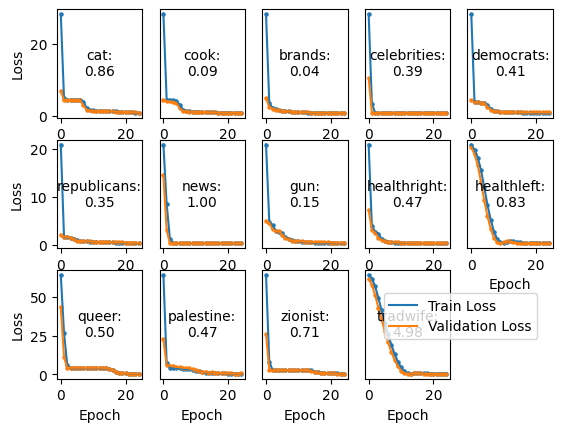

In [ ]:
for i,group in enumerate(model_grouped1.keys()):
  model, train_loss_history, val_loss_history = model_grouped1[group]
  plt.subplot(3,5,i+1)
  plt.text(0.5, 0.5, f'{group}:\n{val_loss_history[-1]:.2f}', ha='center', va='center', transform=plt.gca().transAxes)
  plt.plot(train_loss_history, label='Train Loss', )
  plt.scatter(range(len(train_loss_history)), train_loss_history, color='tab:blue', s=5)
  plt.plot(val_loss_history, label='Validation Loss')
  plt.scatter(range(len(val_loss_history)), val_loss_history, color='tab:orange', s= 5)
  if i % 5 != 0:
    plt.yticks([])
  else:
    plt.ylabel('Loss')
  plt.xlabel('Epoch')

plt.legend(loc = 'lower right', bbox_to_anchor=(2.1,0.3))
plt.show()

In [ ]:
# model_grouped2deriv = {}
# for group, (train_loader, val_loader) in trainval_grouped2deriv.items():
#   print(f"Training {group}")
#   model = TwoBranchDerivLikesPredictor(
#       sbert_dim=384,
#       reachback_length=REACHBACK,
#       verobose=False
#   )

#   device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
#   # device = torch.device('cpu')
#   model = model.to(device)
#   print(f"Using device: {device}")

#   model, train_loss_history, val_loss_history = train_model(model, train_loader, val_loader, lr=0.001, verbose=False, num_epochs=20)

#   model_grouped2deriv[group] = (model, train_loss_history, val_loss_history)

In [ ]:
# for i,group in enumerate(model_grouped2deriv.keys()):
#   model, train_loss_history, val_loss_history = model_grouped2deriv[group]
#   plt.subplot(3,5,i+1)
#   plt.text(0.5, 0.5, f'{group}:\n{val_loss_history[-1]:.2f}', ha='center', va='center', transform=plt.gca().transAxes)
#   plt.plot(train_loss_history, label='Train Loss', )
#   plt.scatter(range(len(train_loss_history)), train_loss_history, color='tab:blue', s=5)
#   plt.plot(val_loss_history, label='Validation Loss')
#   plt.scatter(range(len(val_loss_history)), val_loss_history, color='tab:orange', s= 5)
#   if i % 5 != 0:
#     plt.yticks([])
#   else:
#     plt.ylabel('Loss')
#   plt.xlabel('Epoch')

# plt.legend(loc = 'lower right', bbox_to_anchor=(2.1,0.3))
# plt.show()

In [ ]:
model_grouped2 = {}
for group, (train_loader, val_loader) in trainval_grouped2.items():
  print(f"Training {group}")
  model = TwoBranchLikesPredictor(
      sbert_dim=384,
      reachback_length=REACHBACK,
      verobose=False
  )

  device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
  # device = torch.device('cpu')
  model = model.to(device)
  print(f"Using device: {device}")

  model, train_loss_history, val_loss_history = train_model(model, train_loader, val_loader, lr=0.001, verbose=False, num_epochs=25)

  model_grouped2[group] = (model, train_loss_history, val_loss_history)

Training cat
Using device: cpu


100%|██████████| 25/25 [00:31<00:00,  1.28s/it]


Training cook
Using device: cpu


100%|██████████| 25/25 [00:51<00:00,  2.08s/it]


Training brands
Using device: cpu


100%|██████████| 25/25 [02:56<00:00,  7.08s/it]


Training celebrities
Using device: cpu


100%|██████████| 25/25 [00:59<00:00,  2.38s/it]


Training democrats
Using device: cpu


100%|██████████| 25/25 [01:09<00:00,  2.76s/it]


Training republicans
Using device: cpu


100%|██████████| 25/25 [01:08<00:00,  2.73s/it]


Training news
Using device: cpu


100%|██████████| 25/25 [00:33<00:00,  1.35s/it]


Training gun
Using device: cpu


100%|██████████| 25/25 [01:31<00:00,  3.67s/it]


Training healthright
Using device: cpu


100%|██████████| 25/25 [00:39<00:00,  1.56s/it]


Training healthleft
Using device: cpu


100%|██████████| 25/25 [00:02<00:00,  9.58it/s]


Training queer
Using device: cpu


100%|██████████| 25/25 [00:57<00:00,  2.28s/it]


Training palestine
Using device: cpu


100%|██████████| 25/25 [01:13<00:00,  2.94s/it]


Training zionist
Using device: cpu


100%|██████████| 25/25 [02:55<00:00,  7.02s/it]


Training tradwife
Using device: cpu


100%|██████████| 25/25 [00:06<00:00,  3.86it/s]


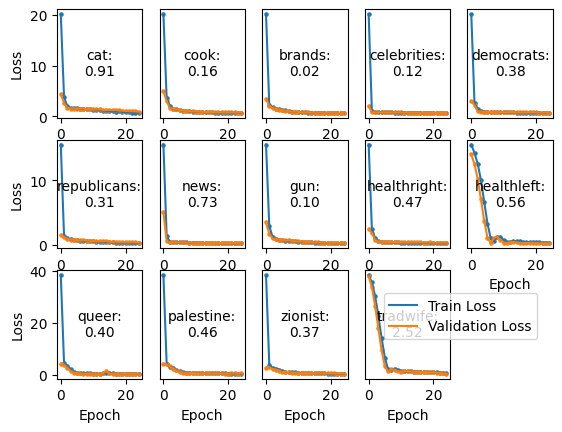

In [ ]:
for i,group in enumerate(model_grouped2.keys()):
  model, train_loss_history, val_loss_history = model_grouped2[group]
  plt.subplot(3,5,i+1)
  plt.text(0.5, 0.5, f'{group}:\n{val_loss_history[-1]:.2f}', ha='center', va='center', transform=plt.gca().transAxes)
  plt.plot(train_loss_history, label='Train Loss', )
  plt.scatter(range(len(train_loss_history)), train_loss_history, color='tab:blue', s=5)
  plt.plot(val_loss_history, label='Validation Loss')
  plt.scatter(range(len(val_loss_history)), val_loss_history, color='tab:orange', s= 5)
  if i % 5 != 0:
    plt.yticks([])
  else:
    plt.ylabel('Loss')
  plt.xlabel('Epoch')

plt.legend(loc = 'lower right', bbox_to_anchor=(2.1,0.3))
plt.show()

In [ ]:
model_grouped3 = {}
for group, (train_loader, val_loader) in trainval_grouped3.items():
  print(f"Training {group}")
  model = ThreeBranchLikesPredictor(
      sbert_dim=384,
      reachback_length=REACHBACK,
      verobose=False
  )

  device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
  # device = torch.device('cpu')
  model = model.to(device)
  print(f"Using device: {device}")

  model, train_loss_history, val_loss_history = train_model(model, train_loader, val_loader, lr=0.001, verbose=False, num_epochs=25)

  model_grouped3[group] = (model, train_loss_history, val_loss_history)

Training cat
Using device: cpu


100%|██████████| 25/25 [00:33<00:00,  1.36s/it]


Training cook
Using device: cpu


100%|██████████| 25/25 [00:55<00:00,  2.22s/it]


Training brands
Using device: cpu


100%|██████████| 25/25 [03:06<00:00,  7.46s/it]


Training celebrities
Using device: cpu


100%|██████████| 25/25 [01:03<00:00,  2.55s/it]


Training democrats
Using device: cpu


100%|██████████| 25/25 [01:13<00:00,  2.93s/it]


Training republicans
Using device: cpu


100%|██████████| 25/25 [01:11<00:00,  2.87s/it]


Training news
Using device: cpu


100%|██████████| 25/25 [00:34<00:00,  1.37s/it]


Training gun
Using device: cpu


100%|██████████| 25/25 [01:37<00:00,  3.91s/it]


Training healthright
Using device: cpu


100%|██████████| 25/25 [00:40<00:00,  1.61s/it]


Training healthleft
Using device: cpu


100%|██████████| 25/25 [00:03<00:00,  6.90it/s]


Training queer
Using device: cpu


100%|██████████| 25/25 [01:04<00:00,  2.57s/it]


Training palestine
Using device: cpu


100%|██████████| 25/25 [01:23<00:00,  3.34s/it]


Training zionist
Using device: cpu


100%|██████████| 25/25 [03:03<00:00,  7.35s/it]


Training tradwife
Using device: cpu


100%|██████████| 25/25 [00:07<00:00,  3.43it/s]


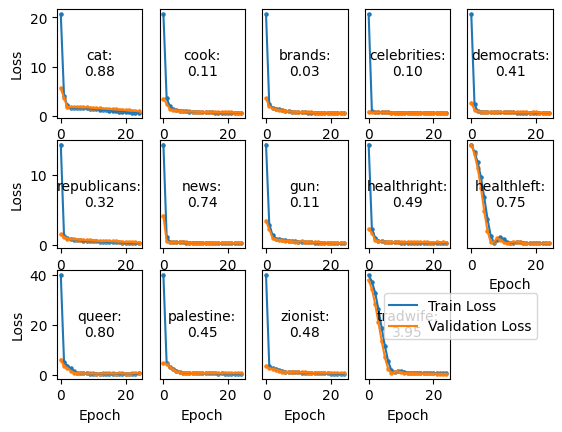

In [ ]:
for i,group in enumerate(model_grouped3.keys()):
  model, train_loss_history, val_loss_history = model_grouped3[group]
  plt.subplot(3,5,i+1)
  plt.text(0.5, 0.5, f'{group}:\n{val_loss_history[-1]:.2f}', ha='center', va='center', transform=plt.gca().transAxes)
  plt.plot(train_loss_history, label='Train Loss', )
  plt.scatter(range(len(train_loss_history)), train_loss_history, color='tab:blue', s=5)
  plt.plot(val_loss_history, label='Validation Loss')
  plt.scatter(range(len(val_loss_history)), val_loss_history, color='tab:orange', s= 5)
  if i % 5 != 0:
    plt.yticks([])
  else:
    plt.ylabel('Loss')
  plt.xlabel('Epoch')

plt.legend(loc = 'lower right', bbox_to_anchor=(2.1,0.3))
plt.show()

In [ ]:
loss = {}
# loss['one'] = [1.3042222829729941, 0.1322471123636643, 0.06989462532554612, 0.4563507162349325, 0.4942909843921661, 0.3941170771916707, 1.0540281456870002, 0.1729786756331027, 0.49412976740794595, 0.9720966219902039, 0.475496735415894, 0.5845634161707867, 0.785887829308371, 5.336733749934605]
for branches,architecture in zip(['three'],[model_grouped3]):
  final_loss = []
  for group, (model, train_loss_history, val_loss_history) in architecture.items():
    final_loss += [val_loss_history[-1]]
    loss[branches] = final_loss
print(loss)

{'three': [0.6245497078356081, 0.09411754319691115, 0.03141997889968589, 0.13235050077965715, 0.21072650399613888, 0.11033004692178808, 0.5246508916219076, 0.08843205912274403, 0.3231729140820822, 1.8471211194992065, 0.505800309002831, 0.6185696541775391, 0.05751745161684723, 0.30766715481877327]}


In [ ]:
loss = {}
# loss['one'] = [1.3042222829729941, 0.1322471123636643, 0.06989462532554612, 0.4563507162349325, 0.4942909843921661, 0.3941170771916707, 1.0540281456870002, 0.1729786756331027, 0.49412976740794595, 0.9720966219902039, 0.475496735415894, 0.5845634161707867, 0.785887829308371, 5.336733749934605]
for branches,architecture in zip(['one','two'],[model_grouped1, model_grouped2]):
  final_loss = []
  for group, (model, train_loss_history, val_loss_history) in architecture.items():
    final_loss += [val_loss_history[-1]]
    loss[branches] = final_loss
print(loss)

{'one': [0.8119317060648267, 0.09030180714887104, 0.05201016272190201, 0.17431352507205447, 0.6155957554249053, 0.23071729640165964, 0.6487047892531488, 0.14092928212549952, 0.38789024254513127, 1.0574390888214111, 0.8770792104417177, 0.6949891581010789, 0.11403568857506856, 0.44171265612787275], 'two': [0.9232050452789251, 0.0576316925134286, 0.03779425060759499, 0.15334679112587432, 0.16287271551629331, 0.08917510806111256, 0.6494924682008345, 0.1172322551569631, 0.3037592445751363, 0.8925648927688599, 0.5258060012818917, 0.6455977026436447, 0.04819292140681906, 0.2598202693642992]}


In [ ]:
loss = {'one': [0.8119317060648267, 0.09030180714887104, 0.05201016272190201, 0.17431352507205447, 0.6155957554249053, 0.23071729640165964, 0.6487047892531488, 0.14092928212549952, 0.38789024254513127, 1.0574390888214111, 0.8770792104417177, 0.6949891581010789, 0.11403568857506856, 0.44171265612787275], 'two': [0.9232050452789251, 0.0576316925134286, 0.03779425060759499, 0.15334679112587432, 0.16287271551629331, 0.08917510806111256, 0.6494924682008345, 0.1172322551569631, 0.3037592445751363, 0.8925648927688599, 0.5258060012818917, 0.6455977026436447, 0.04819292140681906, 0.2598202693642992]}
loss['three'] =  [0.6245497078356081, 0.09411754319691115, 0.03141997889968589, 0.13235050077965715, 0.21072650399613888, 0.11033004692178808, 0.5246508916219076, 0.08843205912274403, 0.3231729140820822, 1.8471211194992065, 0.505800309002831, 0.6185696541775391, 0.05751745161684723, 0.30766715481877327]


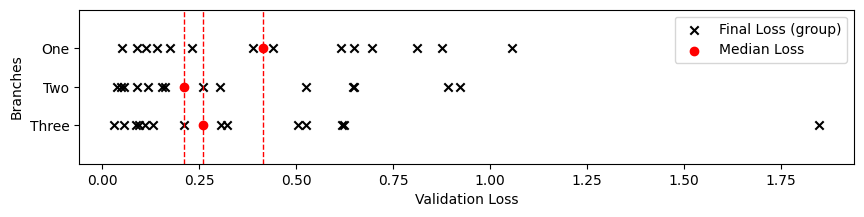

In [ ]:
# loss = {}
# # loss['one'] = [1.3042222829729941, 0.1322471123636643, 0.06989462532554612, 0.4563507162349325, 0.4942909843921661, 0.3941170771916707, 1.0540281456870002, 0.1729786756331027, 0.49412976740794595, 0.9720966219902039, 0.475496735415894, 0.5845634161707867, 0.785887829308371, 5.336733749934605]
# for branches,architecture in zip(['one','two','three'],[model_grouped1, model_grouped2, model_grouped3]):
#   final_loss = []
#   for group, (model, train_loss_history, val_loss_history) in architecture.items():
#     final_loss += [val_loss_history[-1]]
#     loss[branches] = final_loss


plt.figure(figsize = (10,2))
plt.scatter(loss.values(),['One'] * 14 + ['Two'] * 14 + ['Three'] * 14, marker = 'x', c = 'black', label = 'Final Loss (group)')
# plot mean
plt.scatter([np.median(x) for x in (loss.values())], ['One','Two','Three'], c = 'red', label = 'Median Loss')
for median in [np.median(x) for x in (loss.values())]:
  plt.axvline(median, color='red', linestyle='--', lw = 1)
# plt.xlim([0,5])
plt.xlabel('Validation Loss')
plt.ylim([-1,3])
plt.ylabel('Branches')
plt.gca().invert_yaxis()

plt.legend()

plt.savefig(predir+'/figs/model_loss.png', dpi = 800)

# residuals

## one branch

In [ ]:
residuals_grouped1 = {}

for group, (model, train_loss_history, val_loss_history) in tqdm(model_grouped1.items()):
  usernames = groups[group]
  data_after_group = data_after.query(f'username in @usernames')
  dataloader_after = data_loader(data_after_group, OneBranchPrepData)
  dataloader_before = data_loader(data_before.query(f'username in @usernames'), OneBranchPrepData)
  model.eval()
  residuals_before = []
  residuals_after = []
  with torch.no_grad():
      for inputs, targets in dataloader_after:
          inputs, targets = inputs.to(device), targets.to(device)
          outputs = model(inputs)
          residuals_after.extend(targets - outputs.squeeze())

  with torch.no_grad():
    for inputs, targets in dataloader_before:
        inputs, targets = inputs.to(device), targets.to(device)
        outputs = model(inputs)
        residuals_before.extend(targets - outputs.squeeze())

  residuals_grouped1[group] = (residuals_before, residuals_after)

In [ ]:
all_before1 = []
all_after1 = []
for group, (residuals_before, residuals_after) in residuals_grouped1.items():
  all_before1.extend(residuals_before)
  all_after1.extend(residuals_after)

plt.hist(all_before1, alpha = 0.5, label = 'Before June 2023', density = True, bins = np.arange(-10,10,1))
plt.hist(all_after1, alpha = 0.5, label = 'After February 2024', density = True, bins = np.arange(-10,10,1))
plt.legend()
plt.xlabel('Residuals (log likes)')
# plt.savefig(predir+'/figs/residuals_two_branch.png', dpi = 800)

## two branch

In [ ]:
residuals_grouped2 = {}

for group, (model, train_loss_history, val_loss_history) in tqdm(model_grouped2.items()):
  usernames = groups[group]
  data_after_group = data_after.query(f'username in @usernames')
  dataloader_after = data_loader(data_after_group, TwoBranchPrepData)
  dataloader_before = data_loader(data_before.query(f'username in @usernames'), TwoBranchPrepData)
  model.eval()
  residuals_before = []
  residuals_after = []
  with torch.no_grad():
      for inputs, targets in dataloader_after:
          inputs, targets = inputs.to(device), targets.to(device)
          outputs = model(inputs)
          residuals_after.extend(targets - outputs.squeeze())

  with torch.no_grad():
    for inputs, targets in dataloader_before:
        inputs, targets = inputs.to(device), targets.to(device)
        outputs = model(inputs)
        residuals_before.extend(targets - outputs.squeeze())

  residuals_grouped2[group] = (residuals_before, residuals_after)

100%|██████████| 14/14 [03:40<00:00, 15.77s/it]


Text(0.055, 0.5, 'Frequency')

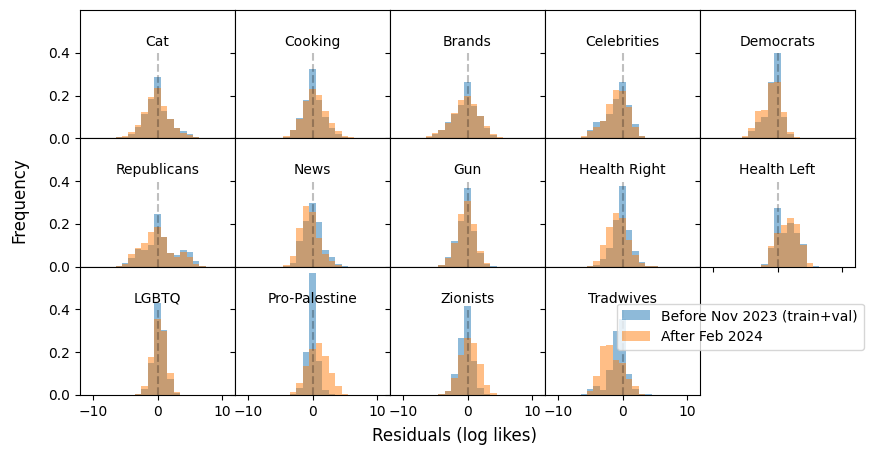

In [ ]:
fig, axes = plt.subplots(3,5, figsize=(10,5), sharey = True, sharex = True)
plt.subplots_adjust(wspace=0, hspace=0)

for i, (ax,(group, (residuals_before, residuals_after))) in enumerate(zip(axes.flat,residuals_grouped2.items())):
  ax.set_xlim([-12, 12])
  # residuals_before = residuals_before_train + residuals_before_val
  ax.hist(residuals_before, alpha = 0.5 ,density=True, label = 'Before Nov 2023 (train+val)', bins = np.arange(-10.5,10.5,1))
  # ax.hist(residuals_before_train, alpha = 0.5 ,density=True, label = 'Before Nov 2023 (train)', bins = np.arange(-10.5,10.5,1))
  # ax.hist(residuals_before_val, alpha = 0.5 ,density=True, label = 'Before Nov 2023 (val)', bins = np.arange(-10.5,10.5,1))
  ax.hist(residuals_after, alpha = 0.5 ,density=True, label = 'After Feb 2024', bins = np.arange(-10.5,10.5,1))
  ax.text(0.5, 0.75, group_titles[group], ha='center', va='center', transform=ax.transAxes)

  # get ymax
  ax.vlines(0, 0, 0.41, linestyles='dashed', colors='black', alpha = 0.25)

  if i == len(residuals_grouped1) - 1:
    # ax.remove()
    ax.legend(loc = 'lower right', bbox_to_anchor=(2.1,0.3))


fig.delaxes(axes[2][4])
fig.supxlabel('Residuals (log likes)')
fig.supylabel('Frequency', x=0.055)
# fig.tight_layout()b

# plt.savefig(predir+'/figs/residuals_large_feb2024.png')

Text(0.5, 0, 'Residuals (log likes)')

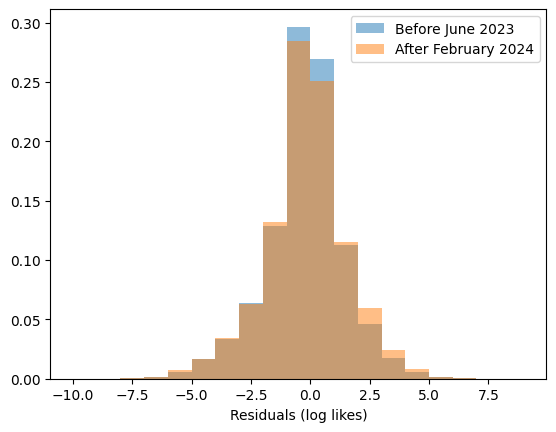

In [ ]:
all_before2 = []
all_after2 = []
for group, (residuals_before, residuals_after) in residuals_grouped2.items():
  all_before2.extend(residuals_before)
  all_after2.extend(residuals_after)

plt.hist(all_before2, alpha = 0.5, label = 'Before June 2023', density = True, bins = np.arange(-10,10,1))
plt.hist(all_after2, alpha = 0.5, label = 'After February 2024', density = True, bins = np.arange(-10,10,1))
plt.legend()
plt.xlabel('Residuals (log likes)')
# plt.savefig(predir+'/figs/residuals_two_branch.png', dpi = 800)

## three branch

In [ ]:
residuals_grouped3 = {}

for group, (model, train_loss_history, val_loss_history) in tqdm(model_grouped3.items()):
  usernames = groups[group]
  data_after_group = data_after.query(f'username in @usernames')
  if len(data_after_group) < 30:
    continue
  dataloader_after = data_loader(data_after_group, ThreeBranchPrepData)
  dataloader_before = data_loader(data_before.query(f'username in @usernames'), ThreeBranchPrepData)
  model.eval()
  residuals_before = []
  residuals_after = []
  with torch.no_grad():
      for inputs, targets in dataloader_after:
          inputs, targets = inputs.to(device), targets.to(device)
          outputs = model(inputs)
          residuals_after.extend(targets - outputs.squeeze())

  with torch.no_grad():
    for inputs, targets in dataloader_before:
        inputs, targets = inputs.to(device), targets.to(device)
        outputs = model(inputs)
        residuals_before.extend(targets - outputs.squeeze())

  residuals_grouped3[group] = (residuals_before, residuals_after)

100%|██████████| 14/14 [04:42<00:00, 20.16s/it]


Text(0.5, 0, 'Residuals (log likes)')

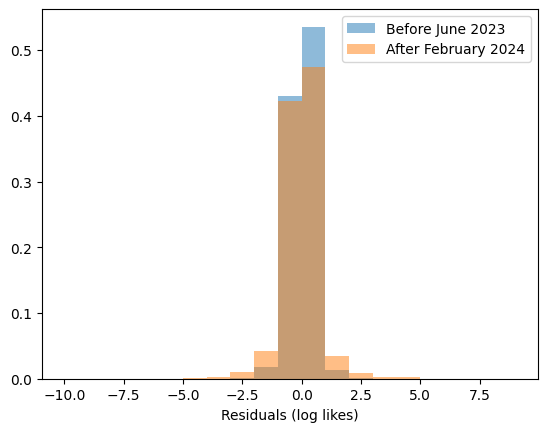

In [ ]:
all_before3 = []
all_after3 = []
for group, (residuals_before, residuals_after) in residuals_grouped3.items():
  all_before3.extend(residuals_before)
  all_after3.extend(residuals_after)

plt.hist(all_before3, alpha = 0.5, label = 'Before June 2023', density = True, bins = np.arange(-10,10,1))
plt.hist(all_after3, alpha = 0.5, label = 'After February 2024', density = True, bins = np.arange(-10,10,1))
plt.legend()
plt.xlabel('Residuals (log likes)')
# plt.savefig(predir+'/figs/residuals_two_branch.png', dpi = 800)

## agg

In [ ]:
png1 = plt.imread(f"{predir}/figs/onebranch.png")
png2 = plt.imread(f"{predir}/figs/twobranch.png")
png3 = plt.imread(f"{predir}/figs/threebranch.png")

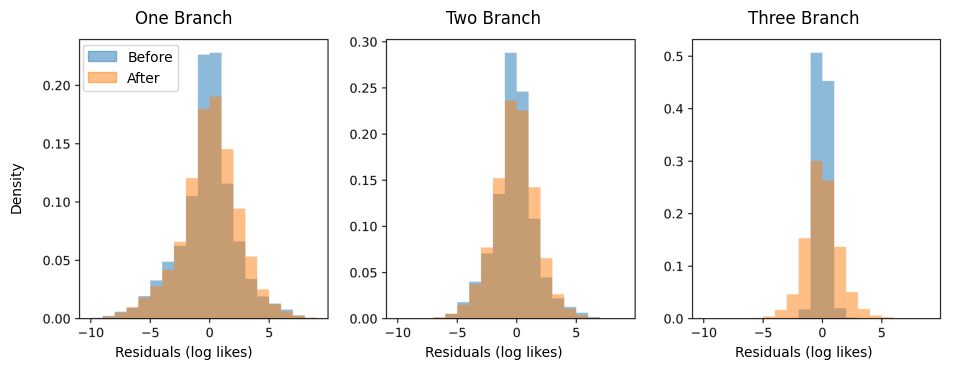

In [ ]:
plt.figure(figsize = (12,4))
plt.subplots_adjust(wspace=0, hspace=0)

plt.subplot(1,3,1)
plt.imshow(png1)
plt.title('One Branch')
plt.yticks([])
plt.xticks([])
# turn frame off
# plt.axis('off')
plt.gca().set(frame_on=False)
plt.xlabel('Residuals (log likes)')
plt.ylabel('Density')
blue = mpatches.Patch(color='tab:blue', label = 'Before', alpha = 0.5)
orange = mpatches.Patch(color='tab:orange', label = 'After', alpha = 0.5)
plt.legend(handles=[blue, orange], loc = 'upper left', bbox_to_anchor = (0.15,0.98))

plt.subplot(1,3,2)
plt.imshow(png2)
plt.title('Two Branch')
# plt.axis('off')
plt.yticks([])
plt.xticks([])
plt.gca().set(frame_on=False)
plt.xlabel('Residuals (log likes)')

plt.subplot(1,3,3)
plt.imshow(png3)
plt.title('Three Branch')
# plt.axis('off')
plt.yticks([])
plt.xticks([])
plt.gca().set(frame_on=False)
plt.xlabel('Residuals (log likes)')

# import matplotlib.patches as mpatches
# blue = mpatches.Patch(color='tab:blue', label = 'Before', alpha = 0.5)
# orange = mpatches.Patch(color='tab:orange', label = 'After', alpha = 0.5)
# plt.legend(handles=[blue, orange], bbox_to_anchor = (1,1), loc = 'upper left')

plt.savefig(predir+'/figs/residuals_compared_volatile.png', dpi = 800,bbox_inches='tight')

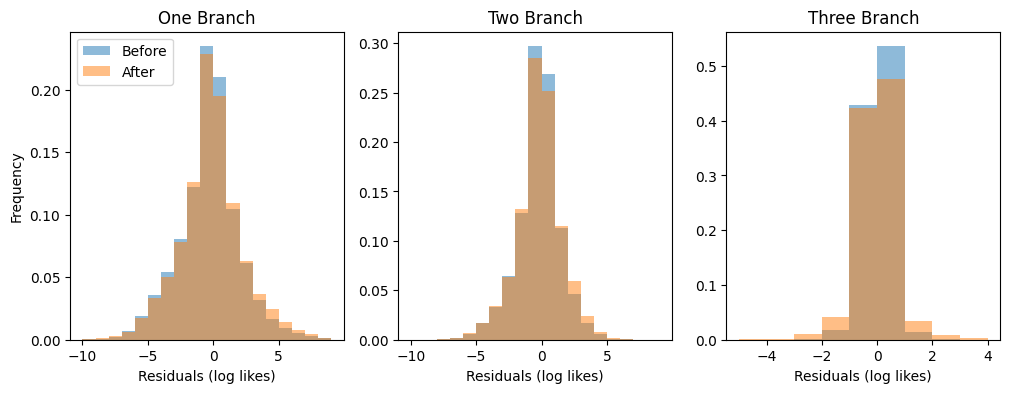

In [ ]:
plt.figure(figsize = (12,4))
plt.subplot(1,3,1)
plt.hist(all_before1, alpha = 0.5, label = 'Before', density = True, bins = np.arange(-10,10,1))
plt.hist(all_after1, alpha = 0.5, label = 'After', density = True, bins = np.arange(-10,10,1))
plt.legend(loc='upper left')
plt.xlabel('Residuals (log likes)')
plt.ylabel('Density')
plt.title('One Branch')

plt.subplot(1,3,2)
plt.hist(all_before2, alpha = 0.5, label = 'Before June 2023', density = True, bins = np.arange(-10,10,1))
plt.hist(all_after2, alpha = 0.5, label = 'After February 2024', density = True, bins = np.arange(-10,10,1))
# plt.legend()
plt.xlabel('Residuals (log likes)')
plt.title('Two Branch')

plt.subplot(1,3,3)
plt.hist(all_before3, alpha = 0.5, label = 'Before June 2023', density = True, bins = np.arange(-5,5,1))
plt.hist(all_after3, alpha = 0.5, label = 'After February 2024', density = True, bins = np.arange(-5,5,1))
# plt.legend(bbox_to_anchor = (1,1), loc = 'upper left')
plt.xlabel('Residuals (log likes)')
plt.title('Three Branch')

plt.savefig(predir+'/figs/residuals_compared.png', dpi = 800,bbox_inches='tight')

# split feb 2024

In [ ]:
split_before = pd.to_datetime('2023-11-01')
data_before = data[data['date'] < split_before]

split = pd.to_datetime('2024-02-01')
data_after = data[data['date'] >= split]

# for the data after, only include [reachback:] for each account
data_after = data_after.groupby('username').apply(lambda x: x.iloc[REACHBACK:]).reset_index(drop=True)

<ipython-input-133-793219b0818e>:8: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  data_after = data_after.groupby('username').apply(lambda x: x.iloc[REACHBACK:]).reset_index(drop=True)


In [ ]:
# two branch

trainval_grouped_feb2024 = {}
for group, usernames in groups.items():
  group_df = data_before.query('username in @usernames')
  print(group, len(group_df), '-'*30)
  if len(group_df) > 100:
    trainval_grouped_feb2024[group] = df_to_traintest(group_df, TwoBranchPrepData)
  else:
    print(f'{group} not enough data')
  # trainval_grouped[group] = df_to_traintest(group_df)

cat 3705 ------------------------------
Train size: 2631
Val size: 658
cook 4183 ------------------------------
Train size: 2852
Val size: 713
brands 12056 ------------------------------
Train size: 9142
Val size: 2286
celebrities 4415 ------------------------------
Train size: 2976
Val size: 745
democrats 5733 ------------------------------
Train size: 4224
Val size: 1056
republicans 5434 ------------------------------
Train size: 3993
Val size: 999
news 2221 ------------------------------
Train size: 1696
Val size: 425
gun 6789 ------------------------------
Train size: 5021
Val size: 1256
healthright 2219 ------------------------------
Train size: 1611
Val size: 403
healthleft 302 ------------------------------
Train size: 155
Val size: 39
queer 2912 ------------------------------
Train size: 2054
Val size: 514
palestine 3009 ------------------------------
Train size: 2069
Val size: 518
zionist 3415 ------------------------------
Train size: 2401
Val size: 601
tradwife 504 ---------

In [ ]:
model_grouped_feb2024 = {}
for group, (train_loader, val_loader) in trainval_grouped_feb2024.items():
  print(f"Training {group}")
  model = TwoBranchLikesPredictor(
      sbert_dim=384,
      reachback_length=REACHBACK,
      verobose=False
  )

  device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
  # device = torch.device('cpu')
  model = model.to(device)
  print(f"Using device: {device}")

  model, train_loss_history, val_loss_history = train_model(model, train_loader, val_loader, lr=0.001, verbose=False, num_epochs=20)

  model_grouped_feb2024[group] = (model, train_loss_history, val_loss_history)

Training cat
Using device: cpu


100%|██████████| 20/20 [00:24<00:00,  1.22s/it]


Training cook
Using device: cpu


100%|██████████| 20/20 [00:25<00:00,  1.28s/it]


Training brands
Using device: cpu


100%|██████████| 20/20 [01:22<00:00,  4.14s/it]


Training celebrities
Using device: cpu


100%|██████████| 20/20 [00:26<00:00,  1.33s/it]


Training democrats
Using device: cpu


100%|██████████| 20/20 [00:38<00:00,  1.95s/it]


Training republicans
Using device: cpu


100%|██████████| 20/20 [00:38<00:00,  1.92s/it]


Training news
Using device: cpu


100%|██████████| 20/20 [00:15<00:00,  1.30it/s]


Training gun
Using device: cpu


100%|██████████| 20/20 [00:45<00:00,  2.29s/it]


Training healthright
Using device: cpu


100%|██████████| 20/20 [00:15<00:00,  1.29it/s]


Training healthleft
Using device: cpu


100%|██████████| 20/20 [00:01<00:00, 14.61it/s]


Training queer
Using device: cpu


100%|██████████| 20/20 [00:19<00:00,  1.02it/s]


Training palestine
Using device: cpu


100%|██████████| 20/20 [00:21<00:00,  1.08s/it]


Training zionist
Using device: cpu


100%|██████████| 20/20 [00:25<00:00,  1.26s/it]


Training tradwife
Using device: cpu


100%|██████████| 20/20 [00:02<00:00,  7.74it/s]


In [ ]:
residuals_grouped_feb2024 = {}

for group, (model, train_loss_history, val_loss_history) in tqdm(model_grouped_feb2024.items()):
  usernames = groups[group]
  data_after_group = data_after.query(f'username in @usernames')
  data_before_group = data_before.query(f'username in @usernames')
  dataloader_after = data_loader(data_after_group, TwoBranchPrepData)
  dataloader_before = data_loader(data_before_group, TwoBranchPrepData)
  dataloader_before_train = trainval_grouped_feb2024[group][0]
  dataloader_before_val = trainval_grouped_feb2024[group][1]

  model.eval()
  residuals_before = []
  residuals_before_train = []
  residuals_before_val = []
  residuals_after = []
  with torch.no_grad():
      for inputs, targets in dataloader_after:
          inputs, targets = inputs.to(device), targets.to(device)
          outputs = model(inputs)
          residuals_after.extend(targets - outputs.squeeze())

  with torch.no_grad():
    for inputs, targets in dataloader_before_train:
        inputs, targets = inputs.to(device), targets.to(device)
        outputs = model(inputs)
        residuals_before_train.extend(targets - outputs.squeeze())

  with torch.no_grad():
    for inputs, targets in dataloader_before_val:
        inputs, targets = inputs.to(device), targets.to(device)
        outputs = model(inputs)
        residuals_before_val.extend(targets - outputs.squeeze())

  with torch.no_grad():
    for inputs, targets in dataloader_before:
        inputs, targets = inputs.to(device), targets.to(device)
        outputs = model(inputs)
        residuals_before.extend(targets - outputs.squeeze())

  residuals_grouped_feb2024[group] = (residuals_before_train,residuals_before_val, residuals_before, residuals_after)
  # residuals_grouped_feb2024[group] = (residuals_before, residuals_after)

100%|██████████| 14/14 [04:30<00:00, 19.32s/it]


## plot residuals

Text(0.055, 0.5, 'Frequency')

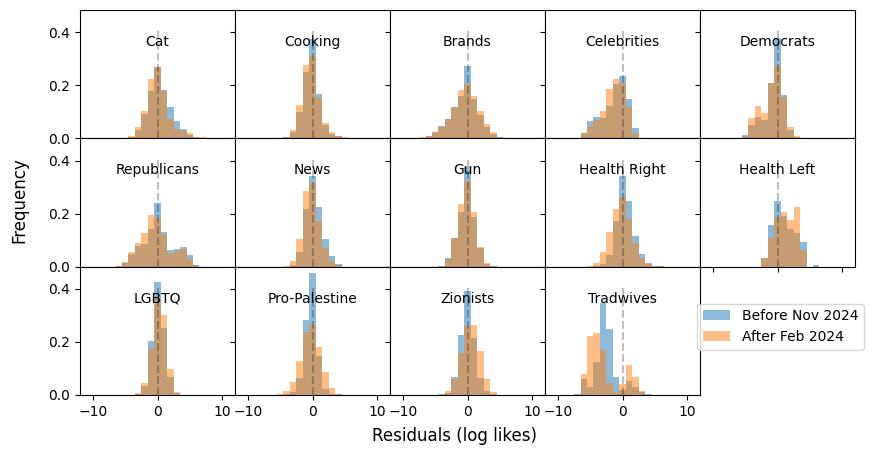

In [ ]:
fig, axes = plt.subplots(3,5, figsize=(10,5), sharey = True, sharex = True)
plt.subplots_adjust(wspace=0, hspace=0)

for i, (ax,(group, (residuals_before_train,residuals_before_val, residuals_before, residuals_after))) in enumerate(zip(axes.flat,residuals_grouped_feb2024.items())):
  ax.set_xlim([-12, 12])
  ax.hist(residuals_before, alpha = 0.5 ,density=True, label = 'Before Nov 2023', bins = np.arange(-10.5,10.5,1))
  # ax.hist(residuals_before_train, alpha = 0.5 ,density=True, label = 'Before Nov 2023 (train)', bins = np.arange(-10.5,10.5,1))
  # ax.hist(residuals_before_val, alpha = 0.5 ,density=True, label = 'Before Nov 2023 (val)', bins = np.arange(-10.5,10.5,1))
  ax.hist(residuals_after, alpha = 0.5 ,density=True, label = 'After Feb 2024', bins = np.arange(-10.5,10.5,1))
  ax.text(0.5, 0.75, group_titles[group], ha='center', va='center', transform=ax.transAxes)

  # get ymax
  ax.vlines(0, 0, 0.41, linestyles='dashed', colors='black', alpha = 0.25)

  if i == len(residuals_grouped1) - 1:
    # ax.remove()
    ax.legend(loc = 'lower right', bbox_to_anchor=(2.1,0.3))


fig.delaxes(axes[2][4])
fig.supxlabel('Residuals (log likes)')
fig.supylabel('Frequency', x=0.055)
# fig.tight_layout()b

# plt.savefig(predir+'/figs/residuals_large_feb2024.png')

In [ ]:
# t-test on averages before and after
from scipy.stats import ttest_ind
from scipy.stats import permutation_test
from datetime import timedelta

df_ttest = pd.DataFrame(columns=['group','tstat','pval','low','high'])

for group, (residuals_before_train,residuals_before_val, residuals_before, residuals_after) in tqdm(residuals_grouped_feb2024.items()):

  # ttest = ttest_ind(before, after, permutations=10_000)
  ttest = ttest_ind(residuals_before, residuals_after)

  interval = ttest.confidence_interval()
  df_ttest = pd.concat([df_ttest, pd.DataFrame({'group': [group], 'tstat': [ttest[0]], 'pval': [ttest[1]], 'low':[interval[0]], 'high':[interval[1]]})])

df_ttest['signif'] = (df_ttest['pval'] * 14) < 0.05 # bonferroni correction

  0%|          | 0/14 [00:00<?, ?it/s]<ipython-input-146-0bc457b18ac2>:14: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  df_ttest = pd.concat([df_ttest, pd.DataFrame({'group': [group], 'tstat': [ttest[0]], 'pval': [ttest[1]], 'low':[interval[0]], 'high':[interval[1]]})])
100%|██████████| 14/14 [00:01<00:00,  8.30it/s]


Text(0.5, 0, 'T-Statistic')

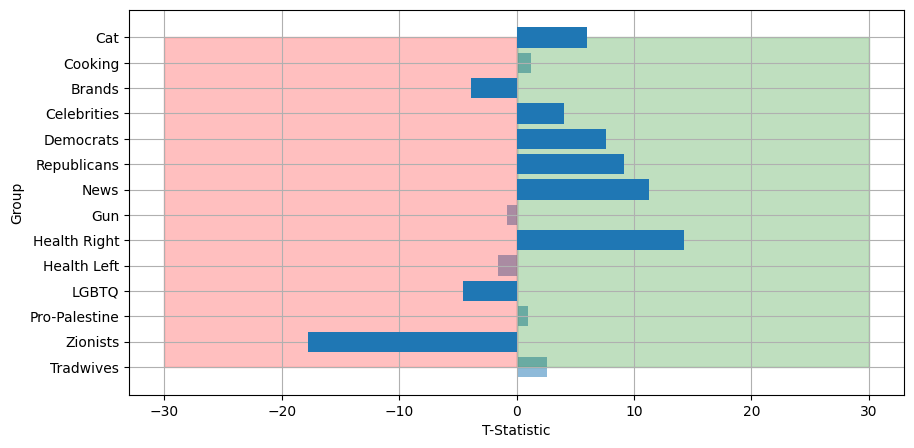

In [ ]:
fig, ax1 = plt.subplots(1,1, figsize=(10,5), sharey = True)

plt.subplots_adjust(wspace=0, hspace=0)

ax1.barh(df_ttest['group'][::-1], df_ttest['tstat'][::-1], alpha = 0.5)
# go again for the significant ones
ax1.barh(df_ttest.query('signif')['group'][::-1], df_ttest.query('signif')['tstat'][::-1], color = 'tab:blue', zorder = 2)

# use fill between to color postive values green and negative values red
ax1.fill_betweenx([0,len(groups)-1], -30, 0, color='red', alpha=0.25, zorder = 1)
ax1.fill_betweenx([0,len(groups)-1], 0, 30, color='green', alpha=0.25, zorder = 1)

ax1.grid(zorder=1)
ax1.set_yticks(range(len(group_titles)), [group_titles.get(g, g) for g in groups.keys()][::-1])
ax1.set_ylabel('Group')
ax1.set_xlabel('T-Statistic')

# plt.savefig(predir+'/figs/ttest_large_feb2024.png')

# split jan 2025

In [ ]:
split_before = pd.to_datetime('2024-10-01')
data_before = data[data['date'] < split_before]

split = pd.to_datetime('2025-01-06')
data_after = data[data['date'] >= split]

# for the data after, only include [reachback:] for each account
data_after = data_after.groupby('username').apply(lambda x: x.iloc[REACHBACK:]).reset_index(drop=True)

<ipython-input-15-8add4e22e57e>:8: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  data_after = data_after.groupby('username').apply(lambda x: x.iloc[REACHBACK:]).reset_index(drop=True)


In [ ]:
# two branch

trainval_grouped_jan2025 = {}
for group, usernames in groups.items():
  group_df = data_before.query('username in @usernames')
  print(group, len(group_df), '-'*30)
  if len(group_df) > 100:
    trainval_grouped_jan2025[group] = df_to_traintest(group_df, TwoBranchPrepData)
  else:
    print(f'{group} not enough data')
  # trainval_grouped[group] = df_to_traintest(group_df)

cat 6549 ------------------------------
Train size: 4876
Val size: 1219
cook 8328 ------------------------------
Train size: 6191
Val size: 1548
brands 25280 ------------------------------
Train size: 19752
Val size: 4938
celebrities 9243 ------------------------------
Train size: 6859
Val size: 1715
democrats 10771 ------------------------------
Train size: 8251
Val size: 2063
republicans 11170 ------------------------------
Train size: 8533
Val size: 2134
news 4512 ------------------------------
Train size: 3529
Val size: 883
gun 13197 ------------------------------
Train size: 10158
Val size: 2540
healthright 4972 ------------------------------
Train size: 3811
Val size: 953
healthleft 558 ------------------------------
Train size: 348
Val size: 88
queer 7281 ------------------------------
Train size: 5523
Val size: 1381
palestine 9506 ------------------------------
Train size: 7158
Val size: 1790
zionist 16590 ------------------------------
Train size: 12901
Val size: 3226
tradwife

In [ ]:
model_grouped_jan2025= {}
for group, (train_loader, val_loader) in trainval_grouped_jan2025.items():
  print(f"Training {group}")
  model = TwoBranchLikesPredictor(
      sbert_dim=384,
      reachback_length=REACHBACK,
      verobose=False
  )

  device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
  # device = torch.device('cpu')
  model = model.to(device)
  print(f"Using device: {device}")

  model, train_loss_history, val_loss_history = train_model(model, train_loader, val_loader, lr=0.001, verbose=False, num_epochs=20)

  model_grouped_jan2025[group] = (model, train_loss_history, val_loss_history)

Training cat
Using device: cpu


100%|██████████| 20/20 [00:40<00:00,  2.05s/it]


Training cook
Using device: cpu


100%|██████████| 20/20 [00:54<00:00,  2.74s/it]


Training brands
Using device: cpu


100%|██████████| 20/20 [02:48<00:00,  8.44s/it]


Training celebrities
Using device: cpu


100%|██████████| 20/20 [00:58<00:00,  2.91s/it]


Training democrats
Using device: cpu


100%|██████████| 20/20 [01:10<00:00,  3.53s/it]


Training republicans
Using device: cpu


100%|██████████| 20/20 [01:14<00:00,  3.73s/it]


Training news
Using device: cpu


100%|██████████| 20/20 [00:30<00:00,  1.50s/it]


Training gun
Using device: cpu


100%|██████████| 20/20 [01:26<00:00,  4.33s/it]


Training healthright
Using device: cpu


100%|██████████| 20/20 [00:32<00:00,  1.64s/it]


Training healthleft
Using device: cpu


100%|██████████| 20/20 [00:02<00:00,  6.96it/s]


Training queer
Using device: cpu


100%|██████████| 20/20 [00:51<00:00,  2.58s/it]


Training palestine
Using device: cpu


100%|██████████| 20/20 [01:02<00:00,  3.12s/it]


Training zionist
Using device: cpu


100%|██████████| 20/20 [01:52<00:00,  5.64s/it]


Training tradwife
Using device: cpu


100%|██████████| 20/20 [00:11<00:00,  1.71it/s]


In [ ]:
list(model_grouped_jan2025.keys())

['cat',
 'cook',
 'brands',
 'celebrities',
 'democrats',
 'republicans',
 'news',
 'gun',
 'healthright',
 'healthleft',
 'queer',
 'palestine',
 'zionist',
 'tradwife']

In [ ]:
residuals_grouped_jan2025.keys()

dict_keys(['cat', 'cook', 'brands', 'celebrities', 'democrats', 'republicans', 'news', 'gun', 'healthright'])

In [ ]:
residuals_grouped_jan2025 = {}

for group, (model, train_loss_history, val_loss_history) in tqdm(model_grouped_jan2025.items()):
  usernames = groups[group]
  data_after_group = data_after.query(f'username in @usernames')
  data_before_group = data_before.query(f'username in @usernames')
  if len(data_after_group) < 30:
    print(f'{group} not enough after data')
    continue
  if len(data_before_group) < 30:
    print(f'{group} not enough before data')
    continue
  dataloader_after = data_loader(data_after_group, TwoBranchPrepData)
  dataloader_before = data_loader(data_before_group, TwoBranchPrepData)
  # dataloader_before_train = trainval_grouped_feb2024[group][0]
  # dataloader_before_val = trainval_grouped_feb2024[group][1]

  model.eval()
  residuals_before = []
  residuals_before_train = []
  residuals_before_val = []
  residuals_after = []
  with torch.no_grad():
      for inputs, targets in dataloader_after:
          inputs, targets = inputs.to(device), targets.to(device)
          outputs = model(inputs)
          residuals_after.extend(targets - outputs.squeeze())

  # with torch.no_grad():
  #   for inputs, targets in dataloader_before_train:
  #       inputs, targets = inputs.to(device), targets.to(device)
  #       outputs = model(inputs)
  #       residuals_before_train.extend(targets - outputs.squeeze())

  # with torch.no_grad():
  #   for inputs, targets in dataloader_before_val:
  #       inputs, targets = inputs.to(device), targets.to(device)
  #       outputs = model(inputs)
  #       residuals_before_val.extend(targets - outputs.squeeze())

  with torch.no_grad():
    for inputs, targets in dataloader_before:
        inputs, targets = inputs.to(device), targets.to(device)
        outputs = model(inputs)
        residuals_before.extend(targets - outputs.squeeze())

  # residuals_grouped_feb2024[group] = (residuals_before_train,residuals_before_val, residuals_before, residuals_after)
  residuals_grouped_jan2025[group] = (residuals_before, residuals_after)

 20%|██        | 1/5 [00:00<00:01,  3.08it/s]

healthleft not enough after data


100%|██████████| 5/5 [01:11<00:00, 14.26s/it]


## plot residuals

Text(0.055, 0.5, 'Frequency')

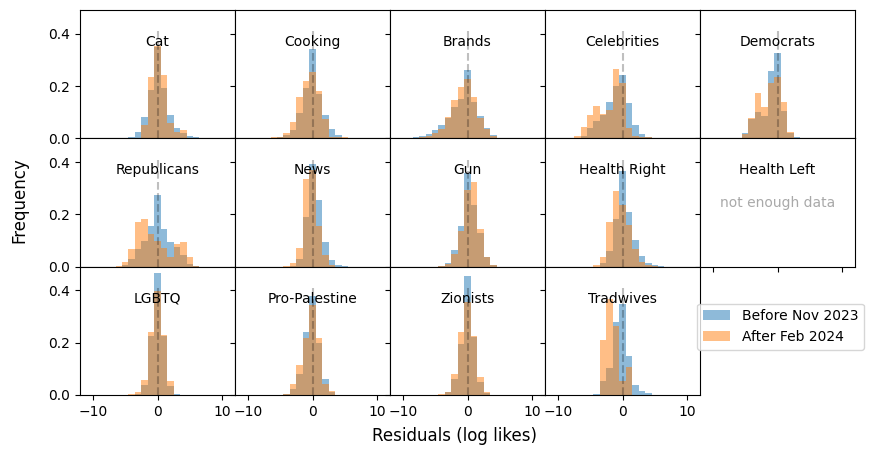

In [ ]:
fig, axes = plt.subplots(3,5, figsize=(10,5), sharey = True, sharex = True)
plt.subplots_adjust(wspace=0, hspace=0)

for i, (ax,(group)) in enumerate(zip(axes.flat,group_order)):
  ax.set_xlim([-12, 12])
  if group in residuals_grouped_jan2025.keys():
    residuals_before, residuals_after = residuals_grouped_jan2025[group]
    ax.hist(residuals_before, alpha = 0.5 ,density=True, label = 'Before Nov 2023', bins = np.arange(-10.5,10.5,1))
    # ax.hist(residuals_before_train, alpha = 0.5 ,density=True, label = 'Before Nov 2023 (train)', bins = np.arange(-10.5,10.5,1))
    # ax.hist(residuals_before_val, alpha = 0.5 ,density=True, label = 'Before Nov 2023 (val)', bins = np.arange(-10.5,10.5,1))
    ax.hist(residuals_after, alpha = 0.5 ,density=True, label = 'After Feb 2024', bins = np.arange(-10.5,10.5,1))
    ax.vlines(0, 0, 0.41, linestyles='dashed', colors='black', alpha = 0.25)
  else:
    ax.text(0.5, 0.5, "not enough data", ha='center', va='center', transform=ax.transAxes, color = 'darkgrey')
  ax.text(0.5, 0.75, group_titles[group], ha='center', va='center', transform=ax.transAxes)
  # get ymax

  if i == len(group_order) - 1:
    # ax.remove()
    ax.legend(loc = 'lower right', bbox_to_anchor=(2.1,0.3))


fig.delaxes(axes[2][4])
fig.supxlabel('Residuals (log likes)')
fig.supylabel('Frequency', x=0.055)
# fig.tight_layout()b

# plt.savefig(predir+'/figs/residuals_large_feb2024.png')

In [ ]:
# t-test on averages before and after
from scipy.stats import ttest_ind
from scipy.stats import permutation_test
from datetime import timedelta

df_ttest = pd.DataFrame(columns=['group','tstat','pval','low','high'])

for group, (residuals_before, residuals_after) in tqdm(residuals_grouped_jan2025.items()):

  # ttest = ttest_ind(before, after, permutations=10_000)
  ttest = ttest_ind(residuals_before, residuals_after)

  interval = ttest.confidence_interval()
  df_ttest = pd.concat([df_ttest, pd.DataFrame({'group': [group], 'tstat': [ttest[0]], 'pval': [ttest[1]], 'low':[interval[0]], 'high':[interval[1]]})])

df_ttest['signif'] = (df_ttest['pval'] * 14) < 0.05 # bonferroni correction

  0%|          | 0/13 [00:00<?, ?it/s]<ipython-input-32-3018fdd0e1ae>:14: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  df_ttest = pd.concat([df_ttest, pd.DataFrame({'group': [group], 'tstat': [ttest[0]], 'pval': [ttest[1]], 'low':[interval[0]], 'high':[interval[1]]})])
100%|██████████| 13/13 [00:00<00:00, 18.12it/s]


Text(0.5, 0, 'T-Statistic')

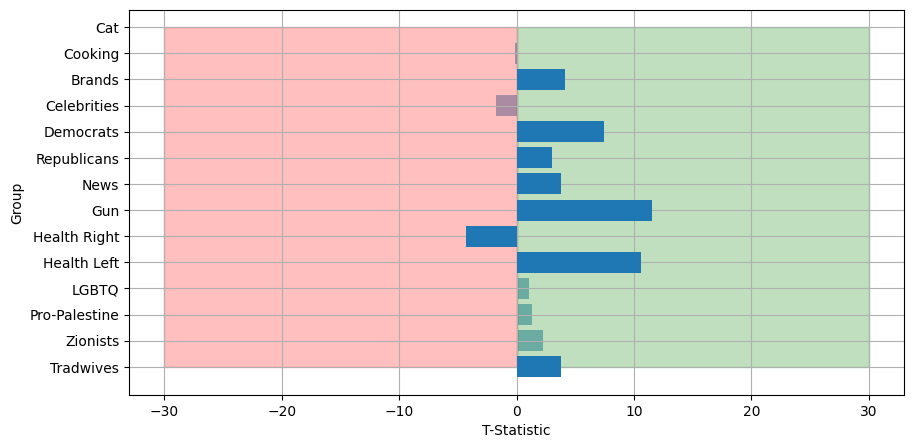

In [ ]:
fig, ax1 = plt.subplots(1,1, figsize=(10,5), sharey = True)

plt.subplots_adjust(wspace=0, hspace=0)

ax1.barh(df_ttest['group'][::-1], df_ttest['tstat'][::-1], alpha = 0.5)
# go again for the significant ones
ax1.barh(df_ttest.query('signif')['group'][::-1], df_ttest.query('signif')['tstat'][::-1], color = 'tab:blue', zorder = 2)

# use fill between to color postive values green and negative values red
ax1.fill_betweenx([0,len(groups)-1], -30, 0, color='red', alpha=0.25, zorder = 1)
ax1.fill_betweenx([0,len(groups)-1], 0, 30, color='green', alpha=0.25, zorder = 1)

ax1.grid(zorder=1)
ax1.set_yticks(range(len(group_titles)), [group_titles.get(g, g) for g in groups.keys()][::-1])
ax1.set_ylabel('Group')
ax1.set_xlabel('T-Statistic')

# plt.savefig(predir+'/figs/ttest_large_feb2024.png')

# split no meaning


In [ ]:
split_before = pd.to_datetime('2024-07-01') # also try 6, 5, 4
data_before = data[data['date'] < split_before]
data_before = data_before[data_before['date'] > pd.to_datetime('2024-02-01')]

split = pd.to_datetime('2024-08-01')
data_after = data[data['date'] >= split]
data_after = data_after[data_after['date'] <= pd.to_datetime('2024-11-01')]

# for the data after, only include [reachback:] for each account
data_after = data_after.groupby('username').apply(lambda x: x.iloc[REACHBACK:]).reset_index(drop=True)

<ipython-input-12-0799db73fc8d>:10: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  data_after = data_after.groupby('username').apply(lambda x: x.iloc[REACHBACK:]).reset_index(drop=True)


In [ ]:
# two branch

trainval_grouped_nomeaning = {}
for group, usernames in groups.items():
  group_df = data_before.query('username in @usernames')
  print(group, len(group_df), '-'*30)
  if len(group_df) > 100:
    trainval_grouped_nomeaning[group] = df_to_traintest(group_df, TwoBranchPrepData)
  else:
    print(f'{group} not enough data')
  # trainval_grouped[group] = df_to_traintest(group_df)

cat 1286 ------------------------------
Train size: 868
Val size: 217
cook 1826 ------------------------------
Train size: 1180
Val size: 296
brands 6272 ------------------------------
Train size: 4691
Val size: 1173
celebrities 2348 ------------------------------
Train size: 1503
Val size: 376
democrats 2503 ------------------------------
Train size: 1753
Val size: 439
republicans 2627 ------------------------------
Train size: 1870
Val size: 468
news 1033 ------------------------------
Train size: 770
Val size: 193
gun 2914 ------------------------------
Train size: 2047
Val size: 512
healthright 1152 ------------------------------
Train size: 815
Val size: 204
healthleft 114 ------------------------------
Train size: 34
Val size: 9
queer 2010 ------------------------------
Train size: 1477
Val size: 370
palestine 2654 ------------------------------
Train size: 1841
Val size: 461
zionist 6845 ------------------------------
Train size: 5262
Val size: 1316
tradwife 236 ----------------

In [ ]:
model_grouped_nomeaning= {}
for group, (train_loader, val_loader) in trainval_grouped_nomeaning.items():
  print(f"Training {group}")
  model = TwoBranchLikesPredictor(
      sbert_dim=384,
      reachback_length=REACHBACK,
      verobose=False
  )

  device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
  # device = torch.device('cpu')
  model = model.to(device)
  print(f"Using device: {device}")

  model, train_loss_history, val_loss_history = train_model(model, train_loader, val_loader, lr=0.001, verbose=False, num_epochs=20)

  model_grouped_nomeaning[group] = (model, train_loss_history, val_loss_history)

Training cat
Using device: cuda


100%|██████████| 20/20 [00:02<00:00,  6.98it/s]


Training cook
Using device: cuda


100%|██████████| 20/20 [00:02<00:00,  7.10it/s]


Training brands
Using device: cuda


100%|██████████| 20/20 [00:11<00:00,  1.74it/s]


Training celebrities
Using device: cuda


100%|██████████| 20/20 [00:03<00:00,  5.13it/s]


Training democrats
Using device: cuda


100%|██████████| 20/20 [00:04<00:00,  4.56it/s]


Training republicans
Using device: cuda


100%|██████████| 20/20 [00:04<00:00,  4.50it/s]


Training news
Using device: cuda


  0%|          | 0/20 [00:00<?, ?it/s]/usr/local/lib/python3.11/dist-packages/torch/nn/modules/loss.py:610: UserWarning: Using a target size (torch.Size([1])) that is different to the input size (torch.Size([])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)
100%|██████████| 20/20 [00:01<00:00, 10.47it/s]


Training gun
Using device: cuda


100%|██████████| 20/20 [00:05<00:00,  3.73it/s]


Training healthright
Using device: cuda


100%|██████████| 20/20 [00:01<00:00, 10.21it/s]


Training healthleft
Using device: cuda


100%|██████████| 20/20 [00:00<00:00, 122.54it/s]


Training queer
Using device: cuda


100%|██████████| 20/20 [00:03<00:00,  5.55it/s]


Training palestine
Using device: cuda


100%|██████████| 20/20 [00:05<00:00,  3.61it/s]


Training zionist
Using device: cuda


100%|██████████| 20/20 [00:12<00:00,  1.56it/s]


Training tradwife
Using device: cuda


100%|██████████| 20/20 [00:00<00:00, 62.07it/s]


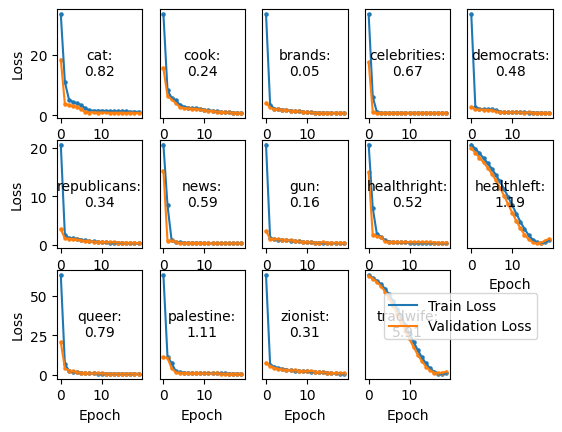

In [ ]:
for i,group in enumerate(model_grouped_nomeaning.keys()):
  model, train_loss_history, val_loss_history = model_grouped_nomeaning[group]
  plt.subplot(3,5,i+1)
  plt.text(0.5, 0.5, f'{group}:\n{val_loss_history[-1]:.2f}', ha='center', va='center', transform=plt.gca().transAxes)
  plt.plot(train_loss_history, label='Train Loss', )
  plt.scatter(range(len(train_loss_history)), train_loss_history, color='tab:blue', s=5)
  plt.plot(val_loss_history, label='Validation Loss')
  plt.scatter(range(len(val_loss_history)), val_loss_history, color='tab:orange', s= 5)
  if i % 5 != 0:
    plt.yticks([])
  else:
    plt.ylabel('Loss')
  plt.xlabel('Epoch')

plt.legend(loc = 'lower right', bbox_to_anchor=(2.1,0.3))
plt.show()

In [ ]:
residuals_grouped_nomeaning = {}

for group, (model, train_loss_history, val_loss_history) in tqdm(model_grouped_nomeaning.items()):
  usernames = groups[group]
  data_after_group = data_after.query(f'username in @usernames')
  data_before_group = data_before.query(f'username in @usernames')
  if len(data_after_group) < 30:
    print(f'{group} not enough after data')
    continue
  if len(data_before_group) < 30:
    print(f'{group} not enough before data')
    continue
  dataloader_after = data_loader(data_after_group, TwoBranchPrepData)
  dataloader_before = data_loader(data_before_group, TwoBranchPrepData)
  dataloader_before_train = trainval_grouped_nomeaning[group][0]
  dataloader_before_val = trainval_grouped_nomeaning[group][1]

  model.eval()
  residuals_before = []
  residuals_before_train = []
  residuals_before_val = []
  residuals_after = []
  with torch.no_grad():
      for inputs, targets in dataloader_after:
          inputs, targets = inputs.to(device), targets.to(device)
          outputs = model(inputs)
          residuals_after.extend(targets - outputs.squeeze())

  # with torch.no_grad():
  #   for inputs, targets in dataloader_before_train:
  #       inputs, targets = inputs.to(device), targets.to(device)
  #       outputs = model(inputs)
  #       residuals_before_train.extend(targets - outputs.squeeze())

  # with torch.no_grad():
  #   for inputs, targets in dataloader_before_val:
  #       inputs, targets = inputs.to(device), targets.to(device)
  #       outputs = model(inputs)
  #       residuals_before_val.extend(targets - outputs.squeeze())

  with torch.no_grad():
    for inputs, targets in dataloader_before:
        inputs, targets = inputs.to(device), targets.to(device)
        outputs = model(inputs)
        residuals_before.extend(targets - outputs.squeeze())

  residuals_grouped_nomeaning[group] = (residuals_before_train,residuals_before_val, residuals_before, residuals_after)
  # residuals_grouped_nomeaning[group] = (residuals_before, residuals_after)

 64%|██████▍   | 9/14 [00:49<00:23,  4.64s/it]

healthleft not enough after data


100%|██████████| 14/14 [01:13<00:00,  5.25s/it]

tradwife not enough after data


In [ ]:
# with open(predir+'/residuals_grouped_nomeaning.pkl', 'wb') as f:
#   pickle.dump(residuals_grouped_nomeaning, f)

with open(predir + '/residuals_grouped_nomeaning.pkl', 'rb') as f:
  residuals_grouped_nomeaning = pickle.load(f)

In [ ]:
len(residuals_before_val)

/usr/local/lib/python3.11/dist-packages/numpy/lib/_histograms_impl.py:895: RuntimeWarning: invalid value encountered in divide
  return n/db/n.sum(), bin_edges


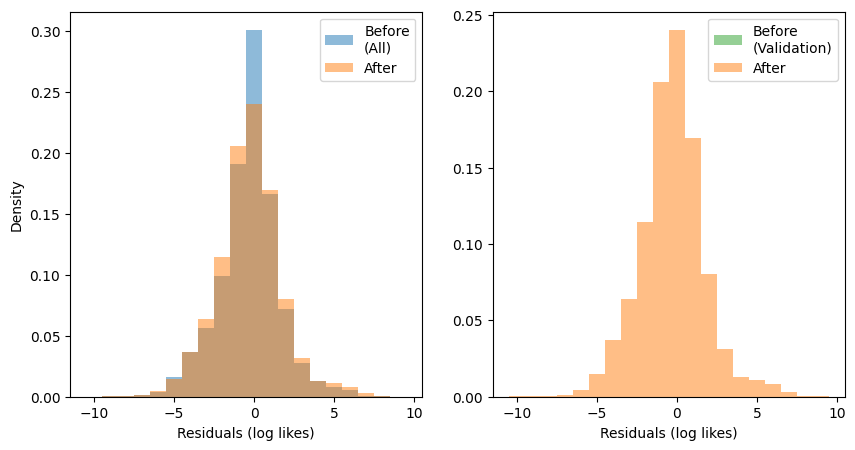

In [ ]:
all_before = []
all_after = []
for group, (residuals_before_train,residuals_before_val, residuals_before, residuals_after) in residuals_grouped_nomeaning.items():
  all_before.extend(residuals_before)
  all_after.extend(residuals_after)

plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
plt.hist(all_before, alpha = 0.5 ,density=True, label = 'Before\n(All)', bins = np.arange(-10.5,10.5,1))
plt.hist(all_after, alpha = 0.5 ,density=True, label = 'After', bins = np.arange(-10.5,10.5,1))
plt.xlabel('Residuals (log likes)')
plt.ylabel('Density')
plt.legend()

plt.subplot(1,2,2)
plt.hist(residuals_before_val, alpha = 0.5 ,density=True, label = 'Before\n(Validation)', bins = np.arange(-10.5,10.5,1), color = 'tab:green')
plt.hist(all_after, alpha = 0.5 ,density=True, label = 'After', bins = np.arange(-10.5,10.5,1), color = 'tab:orange')
plt.xlabel('Residuals (log likes)')
plt.legend()

# plt.savefig(predir+'/figs/residuals_val_vs_all.png', dpi = 800)

## plot residuals

In [ ]:
with open(predir+'/residuals_grouped_nomeaning.pkl', 'rb') as f:
  residuals_grouped_nomeaning = pickle.load(f)

In [ ]:
# t-test on averages before and after
# from scipy.stats import ttest_ind
# from scipy.stats import permutation_test
# from datetime import timedelta

# df_ttest = pd.DataFrame(columns=['group','tstat','pval','low','high'])

# for group, (residuals_before_train,residuals_before_val, residuals_before, residuals_after) in tqdm(residuals_grouped_nomeaning.items()):
#   residuals_before = [x.cpu().numpy() for x in residuals_before]
#   residuals_after = [x.cpu().numpy() for x in residuals_after]

#   # ttest = ttest_ind(before, after, permutations=10_000)
#   ttest = ttest_ind(residuals_before, residuals_after)

#   interval = ttest.confidence_interval()
#   df_ttest = pd.concat([df_ttest, pd.DataFrame({'group': [group], 'tstat': [ttest[0]], 'pval': [ttest[1]], 'low':[interval[0]], 'high':[interval[1]]})])

# df_ttest['signif'] = (df_ttest['pval'] * 14) < 0.05 # bonferroni correction

# t-test on averages before and after
from scipy.stats import ttest_ind
from scipy.stats import permutation_test
from datetime import timedelta

df_ttest = pd.DataFrame(columns=['group','tstat','pval','residual'])

for group, (residuals_before_train,residuals_before_val, residuals_before, residuals_after) in tqdm(residuals_grouped_nomeaning.items()):

    residuals_before = [x.cpu().numpy() for x in residuals_before]
    residuals_after = [x.cpu().numpy() for x in residuals_after]

    ttest = ttest_ind(residuals_before, residuals_after)
    # interval = ttest.confidence_interval()
    df_ttest = pd.concat([df_ttest, pd.DataFrame({'group': [group], 'tstat': [ttest[0]], 'pval': [ttest[1]], 'residual':True})])

    before_ll = data_before.query('group == @group')['log_likes']
    after_ll = data_after.query('group == @group')['log_likes']

    ttest = ttest_ind(before_ll, after_ll)

    df_ttest = pd.concat([df_ttest, pd.DataFrame({'group': [group], 'tstat': [ttest[0]], 'pval': [ttest[1]], 'residual':False})])

df_ttest['signif'] = (df_ttest['pval'] * 14) < 0.05 # bonferroni correction

df_ttest = pd.concat([df_ttest, pd.DataFrame({'group': ['healthleft','healthleft','queer','queer'], 'residual':[True,False,True,False]})])

# # order df_ttest by group_order
# df_ttest = df_ttest.set_index('group')
# # fill in missing groups
# df_ttest = df_ttest.reindex(group_order)
# df_ttest = df_ttest.loc[group_order].reset_index()
df_ttest['tstat'].fillna(0, inplace=True)
df_ttest['signif'].fillna(False, inplace=True)
df_ttest['signif_values'] = np.where(df_ttest['signif'], df_ttest['tstat'], 0)

  0%|          | 0/12 [00:00<?, ?it/s]<ipython-input-38-4d54fe03f987>:34: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  df_ttest = pd.concat([df_ttest, pd.DataFrame({'group': [group], 'tstat': [ttest[0]], 'pval': [ttest[1]], 'residual':True})])
100%|██████████| 12/12 [00:01<00:00, 10.47it/s]
<ipython-input-38-4d54fe03f987>:52: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] =

Text(-0.32, 0.5, 'Group')

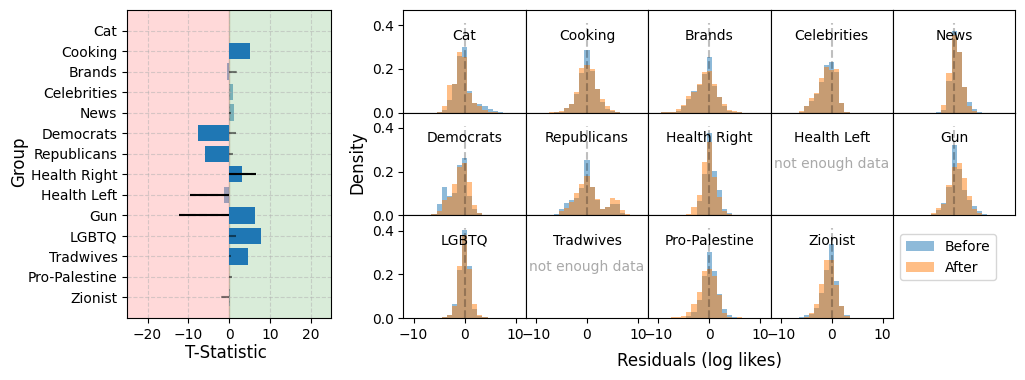

In [ ]:
fig = plt.figure(figsize=(10,4))
subfigs = fig.subfigures(1,2, width_ratios = [1,3], wspace= -0.1)

axL = subfigs[1].subplots(3,5, sharey = True, sharex = True)
plt.subplots_adjust(wspace=0, hspace=0)
for i, (ax,(group)) in enumerate(zip(axL.flat,group_order)):
  ax.set_xlim([-12, 12])
  if group in residuals_grouped_nomeaning.keys():
    residuals_before_train,residuals_before_val, residuals_before, residuals_after = residuals_grouped_nomeaning[group]
    residuals_before = [x.cpu().numpy() for x in residuals_before]
    residuals_after = [x.cpu().numpy() for x in residuals_after]
    ax.hist(residuals_before, alpha = 0.5 ,density=True, label = 'Before', bins = np.arange(-10.5,10.5,1))
    ax.hist(residuals_after, alpha = 0.5 ,density=True, label = 'After', bins = np.arange(-10.5,10.5,1))
    ax.vlines(0, 0, 0.41, colors='black', alpha = 0.25, linestyles="dashed")
  else:
    ax.text(0.5, 0.5, "not enough data", ha='center', va='center', transform=ax.transAxes, color = 'darkgrey')
  ax.text(0.5, 0.75, group_titles[group], ha='center', va='center', transform=ax.transAxes)
  # get ymax
  ax.set_ylim([0,0.47])

  if i == len(group_order) - 2:
    ax.legend(loc = 'lower right', bbox_to_anchor=(2.9,0.3))
  if i % 5 != 0:
    ax.yaxis.set_visible(False)
  if i == 9:
    ax.xaxis.set_visible(False)

  # if i%5 != 0:
  #   ax.set_yticks([])
  # else:
  #   ax.set_yticks([0,0.2,0.4])

# delete the last ax
axL.flat[-1].remove()
subfigs[1].supxlabel('Residuals (log likes)', y=-0.02)
subfigs[1].supylabel('Density', x=0.055)

#######################################
axR = subfigs[0].subplots(1,1)
axR.barh(df_ttest.query('residual == True')['group'][::-1], df_ttest.query('residual == True')['tstat'][::-1], alpha = 0.5)
axR.barh(df_ttest.query('signif ==True and residual == True')['group'][::-1], df_ttest.query('signif ==True and residual == True')['tstat'][::-1], color = 'tab:blue', zorder = 2)

axR.hlines(range(len(group_order)), xmin=0, xmax=df_ttest.query('residual == False')['tstat'], color='black', zorder = 4, alpha = 0.5, linestyles='dashed')
# axR.hlines(, xmin=0, xmax=df_ttest.query('residual'), color='black', zorder = 4, alpha = 0.5, linestyles='dashed')
axR.hlines(range(len(group_order)), xmin=0, xmax=df_ttest.query('residual == False')['signif_values'], color='black', zorder = 4)


# use fill between to color postive values green and negative values red
axR.fill_betweenx([-100,100], -100, 0, color='red', alpha=0.15, zorder = 1)
axR.fill_betweenx([-100,100], 0, 100, color='green', alpha=0.15, zorder = 1)

# set ylim xlim
axR.set_ylim([-1,len(group_order)])
axR.set_xlim([-25,25])

axR.grid(zorder=1, alpha = 0.5,  linestyle='--')
axR.set_yticks(range(len(group_titles)), [group_titles.get(g, g) for g in group_order][::-1])
axR.set_xticks([-20,-10,0,10,20])

# signif_patch = mpatches.Patch(color='tab:blue', alpha = 1, label = 'Significant')
# insignif_patch = mpatches.Patch(color='tab:blue', alpha = 0.5, label = 'Insignificant')
# axR.legend(handles=[signif_patch, insignif_patch], loc = 'lower left')

subfigs[0].supxlabel('T-Statistic', y = 0)
subfigs[0].supylabel('Group', x = -0.32)

# plt.savefig(predir+'/figs/ttest_control.png',bbox_inches='tight', dpi = 800)